
<div>
<center>
    <br>
    <h1>UNIVERSITY OF LONDON INTERNATIONAL PROGRAMMES</h1>
    <h2>Bachelor of Science (Honours) in Computer Science</h2><br>
    <img src="assets/UOL-Insignia.png" alt="University of London Insignia (image unavailable)" width="200"/><br>
    <h1><b>Deep Learning Breast Cancer Detection</b></h1>
    <h3>Author: Wong Zheng Jie <br><br>
    10246254<br><br><br>
    University of London<br><br>
    Singapore Institute of Management<br><br>
    Module: CM3015 Machine Learning and Neural Networks<br><br>
    Supervisor: Mr Hai Kian Loh<br><br><br>
    <br>
</center>
</div>

 ---

## Abstract

This notebook supports a broader project focused on enhancing breast cancer identification in mammography images through deep learning techniques. Although it is not the primary report, it contains sections that offer contextual support for the code-driven investigation. This notebook records the data manipulation, model setup, training processes, as well as outcomes and evaluations, acting as a reproducible environment for experimentation and development.

## Introduction

### Project Background

In early 2025, the UK National Health Service (NHS) initiated a significant research project to investigate whether deep learning–assisted X-ray mammography can improve the accuracy of breast cancer screening. If proven effective, a Deep Learning system could replace one of the two radiologists presently reviewing mammograms, leading to faster diagnostic turnaround and allowing specialists to focus on other critical clinical tasks [1][2].
At the core of various deep learning methods for image classification lies Convolutional Neural Networks (CNNs). CNNs apply a succession of filters to the input layer, facilitating the extraction of hierarchical features, making them highly effective for image classification tasks including detecting abnormalities in medical images.
This project aims to improve deep learning breast cancer detection on x-ray mammography images using deep learning methods like CNNs in hopes of relieving specialists for other essential clinical responsibilities.

### Data Source and Relevancy

The dataset selected is the Mini-DDSM dataset [3][4] based on the Digital Database for Screening Mammography (DDSM) dataset. [5]
Several factors preceded the decision to use Mini-DDSM over the original DDSM dataset and other available datasets:

- The original DDSM dataset on itself is one of the most accessible and cleanest breast cancer related public datasets available [6].

- While the Digital Database for Screening Mammography, also known as CBIS-DDSM [7] also provides images, these datasets are stripped from their original identification filename and from the age attribute, limiting its use for certain types of analysis.

- The original DDSM image files are compressed with lossless JPEG (LJPEG) encoding that are generated using broken software (or acknowledged as an outdated tool on the DDSM website), this complicates the direct use of the DDSM dataset. Retrieving the original DDSM dataset for use would lead to a repetition in steps following the Mini-DDSM dataset (e.g. ensuring uncorrupted images, correct annotations, manually examining to remove outliers)

- The Mini-DDSM dataset was carefully assembled from DDSM, involving manual inspection to eliminate anomalies and outliers (such as incorrect entries like mammograms designated for a one-year-old female). Consequently, Mini-DDSM provides a high-quality, well-annotated, and accessible collection of mammographic images, metadata, and annotations, making it especially valuable due to the overall lack of publicly accessible, well annotated healthcare imaging datasets.


### About Breast Cancer

Breast cancer stands as one of the most common types of cancer impacting people globally, occurring more frequently in women, though it is also found in men. As per the World Health Organization (WHO), in 2024, while lung cancer remained as the most commonly occurring cancer (12.4% of the total cases), breast cancer was the second most frequently diagnosed cancer worldwide (11.6% of the total cases) [8]. Timely identification and intervention greatly enhance outlook and survival probabilities, which is why screening methods like mammography are vital in public health programs.

Breast cancer occurs when breast cells grow uncontrollably, leading to the formation of clusters of cancer cells or a tumour. These formations usually begin in the Lobules (milk-producing glands) or the Ducts (thin tubes that carry milk from the lobules to the nipples). [9]
The staging of breast cancer, known as the Tumour, Nodes, and Metastasis (TNM) system, expressed as Roman numerals from 0 through IV, ranges from [10]:

- Stage 0: non-invasive breast cancers, where abnormal cells are present but confined to the part of the breast in which they started.

- Stage I: Invasive cancers are at an early stage where the tumour has extended to adjacent tissues or lymph nodes but is still confined. (tumour less than 2 cm)

- Stage II: Invasive cancers are at an early stage where the tumour has extended to adjacent tissues or lymph nodes but is still confined. (tumour between 2 and 5 cm, and may have spread to nearby lymph nodes)

- Stage III: More advanced local spread, frequently engaging regional lymph nodes.

- Stage IV: Metastatic breast cancer, invasive breast cancer that has spread beyond the breast and lymph nodes to distant organs.

Mammography is a non-invasive imaging method employing low-dose X-rays to investigate breast tissue for indications of cancerous formations [11][12]. Although it continues to be the best method for screening, interpreting it is inherently difficult because of elements such as breast density and the subtlety of early-stage indicators, resulting in both false negatives and false positives. By employing AI and DL methods to mammography images, this study hopes to enhance detection accuracy and support early cancer intervention.



## Aim and Objectives

Although the Mini-DDSM dataset was originally meant for Mammography-based Automatic Age Estimation, it has been repurposed in several works shared on Kaggle with the same or similar objective of breast cancer detection with Convolutional Neural Networks [3].
Several limitations have been identified in existing projects as areas for improvement:

- Many projects utilizing Mini-DDSM do not provide clear documentation of essential steps like data preprocessing and evaluation methods, making it complicated for other researchers to replicate results or expand on their findings.

- Some projects may not apply proper regularization; this can lead to overfitting and poor generalization since the Mini-DDSM dataset is relatively limited.

- Current projects frequently concentrate on model performance metrics, neglecting how these models can be effectively integrated into clinical workflows, restricting real-world implementation insights.

- 
This project seeks to overcome these limitations by conducting comparative analysis between models for breast cancer detection on mammographic images, with the objective of enhancing breast cancer screening accuracy.


## Motivations

Breast cancer continues to be a significant global health issue, with its incidence increasing by around 1% each year from 2012 to 2021, especially in women [13]. Although female breast cancer has been the primary focus of most research and screening initiatives, male breast cancer (MBC) continues to be notably underrepresented in population studies and clinical trials, despite its acknowledgment as a separate clinical entity. [14]

There is also a need to create tools that reduce human mistakes and speed up diagnostic procedures, particularly for the early detection of breast cancer, as timely intervention can significantly improve patient outcomes.

As mentioned by the UK government as well, every four minutes, a person in the UK succumbs to cancer, and an independent investigation of the NHS in England [15] revealed that survival rates for certain cancers in the UK are lower than in comparable countries. AI DL assistance can relieve 1 of 2 radiologists needed for mammogram screenings. This could enable many radiologists and various specialists nationwide to attend to more patients, address increasing cancer rates, save additional lives and reduce waiting lists. [2]

By utilizing deep learning methods, this project seeks to improve the accuracy and effectiveness of breast cancer screening, providing the opportunity to assist radiologists and improve diagnostic consistency.


## Defining the problem and assembling a dataset

The primary objective outlined in this project is a supervised image classification problem, where an initial model is developed to differentiate between mammographic images with and without indications of breast cancer, and is progressively improved upon. Classification is carried out using diagnostic labels found in the dataset, particularly distinguishing between malignant and non-malignant instances.

For this project, the Mini-DDSM dataset [3][4] is utilized as the primary dataset. As outlined in Data Source and Relevancy, it includes annotated mammogram images in standard formats and has been prepared for seamless integration into deep learning processes. The dataset should be split into training, validation, and testing subsets, guaranteeing a stratified class distribution to keep balance throughout each set.


## Choosing a measure of success

In a medical setting, especially for potential clinical settings, like breast cancer detection, depending exclusively on accuracy as a performance measure can be deceptive, particularly in datasets with class imbalance or when the cost of misclassification is asymmetric. In this project, a true positive prediction (detecting cancer when it exists) holds considerably more clinical significance than a true negative prediction. On the other hand, a false negative (wrongly indicating that cancer is absent) might result in postponed diagnosis and treatment, making it crucial to minimise such probable mistakes.

While accuracy will be reported, it is not the main success criterion. To achieve a more comprehensive insight into model behaviour, confusion matrix will be used to illustrate the tallies of true positives, true negatives, false positives, and false negatives. This allows for immediate understanding of the kinds of mistakes the model is making and their frequency. To guarantee a thorough assessment, the following set of applicable performance indicators will also be applied:

- Sensitivity (Recall)
Evaluates the ratio of correctly identified actual positive cases (malignant). Having high sensitivity is essential for reducing the number of false negatives.

- Specificity
Evaluates the model’s capacity to accurately recognize negative instances (benign or normal), aiding in the decrease of false positives.

- Precision
Shows the fraction of accurate positive predictions, taking false positives into account.


- F1-Score
The harmonic mean of precision and recall is beneficial for assessing performance when both false positives and false negatives are relevant.


- Area Under the ROC Curve (AUC-ROC)
Represents the balance between true positive and false positive rates at different thresholds and offers a solid metric of separability.

These metrics will be evaluated on the validation and testing datasets to determine both model performance and generalization. The model's effectiveness will not solely be determined by its numerical outcomes across these metrics but also by its consistency and dependability in reducing significant errors.


## Deciding on an evaluation protocol

To guarantee a strong and impartial assessment of model effectiveness, a clearly defined evaluation protocol should be created. The data is divided into three separate subsets: training, validation, and testing. This permits distinct stages of learning, model adjustment, and ultimate performance assessment without data contamination or overfitting to the test dataset.

The stratified splitting approach is planned to be utilized to preserve the identical ratio of malignant and non-malignant cases throughout all three subsets. This is crucial in medical imaging tasks, where imbalanced datasets frequently occur and might otherwise result in distorted or misleading performance metrics.

Due to the moderate scale of the Mini-DDSM dataset, approaches like data augmentation may be employed to enhance the effective training size and minimize overfitting. Moreover, early stopping and cross-validation could be considered to guarantee that the model generalizes effectively and is not overly tailored to the validation dataset.

This evaluation protocol guarantees that performance metrics accurately represent the model’s generalization capability, especially in real-world clinical screening and medical settings, by distinctly separating training, validation, and testing phases while employing stratified sampling.


## Preparing your data

### Importing Libraries

In [13]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [1]:
import os
import shutil
import pandas as pd
import numpy as np
import random
import seaborn as sns
import cv2
import glob
from tqdm import tqdm

import matplotlib.pyplot as plt
from matplotlib.colors import Normalize

import tensorflow as tf
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models, regularizers, callbacks, losses, optimizers, backend as K
from tensorflow.keras.utils import to_categorical, Sequence
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras import Model, Input
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D, Conv2D, MaxPooling2D, BatchNormalization, Concatenate, SpatialDropout2D, Lambda

from tensorflow.keras.optimizers import Adam

from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, precision_score, recall_score, f1_score, jaccard_score
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import StratifiedKFold, train_test_split

### Loading and Preparing Dataset

Before preparing the dataset for training, we should understand the data we are dealing with. The Mini-DDSM file structure was examined and included a JPEG-8 and PNG-16 version. The PNG-16 format was chosen because it means 16-bit depth, preserving significantly more pixel intensity details, which is crucial for identifying slight tissue variations. The images are organized into a folder for training purposes and csv file was created to locate masks for identifying cancer biomarker locations.

In [4]:
# directories
# Original Source Folder
source_dir = 'The Complete Mini-DDSM archive/MINI-DDSM-Complete-PNG-16'
# Folder to store images
combined_img_dir = 'Combined_MiniDDSM_imgs'
# Folder to store Mask images
combined_img_mask_dir = 'Combined_MiniDDSM_img_Masks'

# Create output directories for images and masks
for root in [combined_img_dir, combined_img_mask_dir]:
    os.makedirs(root, exist_ok=True)
    for label in ['Benign', 'Cancer', 'Normal']:
        os.makedirs(os.path.join(root, label), exist_ok=True)

# copy images and masks
for label in ['Benign', 'Cancer', 'Normal']:
    label_path = os.path.join(source_dir, label)
    target_label_path = os.path.join(combined_img_dir, label)
    target_mask_label_path = os.path.join(combined_img_mask_dir, label)

    for case_id in os.listdir(label_path):
        case_path = os.path.join(label_path, case_id)

        if os.path.isdir(case_path):
            for file in os.listdir(case_path):
                if file.endswith(('CC.png', 'MLO.png')) and 'Mask' not in file:
                    
                    # Copy image file to the new image folder
                    src_img = os.path.join(case_path, file)
                    dst_img = os.path.join(target_label_path, file)
                    shutil.copyfile(src_img, dst_img)
            
                    # Copy mask image file to the new mask image folder
                    mask_name = file.replace('.png', '_Mask.png')
                    src_mask = os.path.join(case_path, mask_name)
                    if os.path.exists(src_mask):
                        dst_mask = os.path.join(target_mask_label_path, mask_name)
                        shutil.copyfile(src_mask, dst_mask)
    
print(f"Copy Complete")

Copy Complete


In [6]:
# Empty list to hold metadata for images and mask images
data = []

# Iterates over each directory inside the combined image folder
for label in os.listdir(combined_img_dir):
    label_combined_img_dir = os.path.join(combined_img_dir, label)
    label_combined_img_mask_dir = os.path.join(combined_img_mask_dir, label)

    if os.path.isdir(label_combined_img_dir):
        for fname in os.listdir(label_combined_img_dir):
            if fname.lower().endswith('.png'):
                img_path = os.path.join(label_combined_img_dir, fname)
                mask_name = fname.replace('.png', '_Mask.png')
                mask_path = os.path.join(label_combined_img_mask_dir, mask_name)

                # If mask exists then add it to the metadata else label as None
                if os.path.exists(mask_path):
                    data.append({'image_path': img_path, 'mask_path': mask_path, 'label': label})
                else:
                    data.append({'image_path': img_path, 'mask_path': None, 'label': label})

# saving metadata csv file
df = pd.DataFrame(data)
df.to_csv("Combined_MiniDDSM_Metadata.csv", index=False)
print("Saved Combined_MiniDDSM_Metadata.csv")

Saved Combined_MiniDDSM_Metadata.csv


Benign: 2684 images
Cancer: 2716 images
Normal: 2408 images


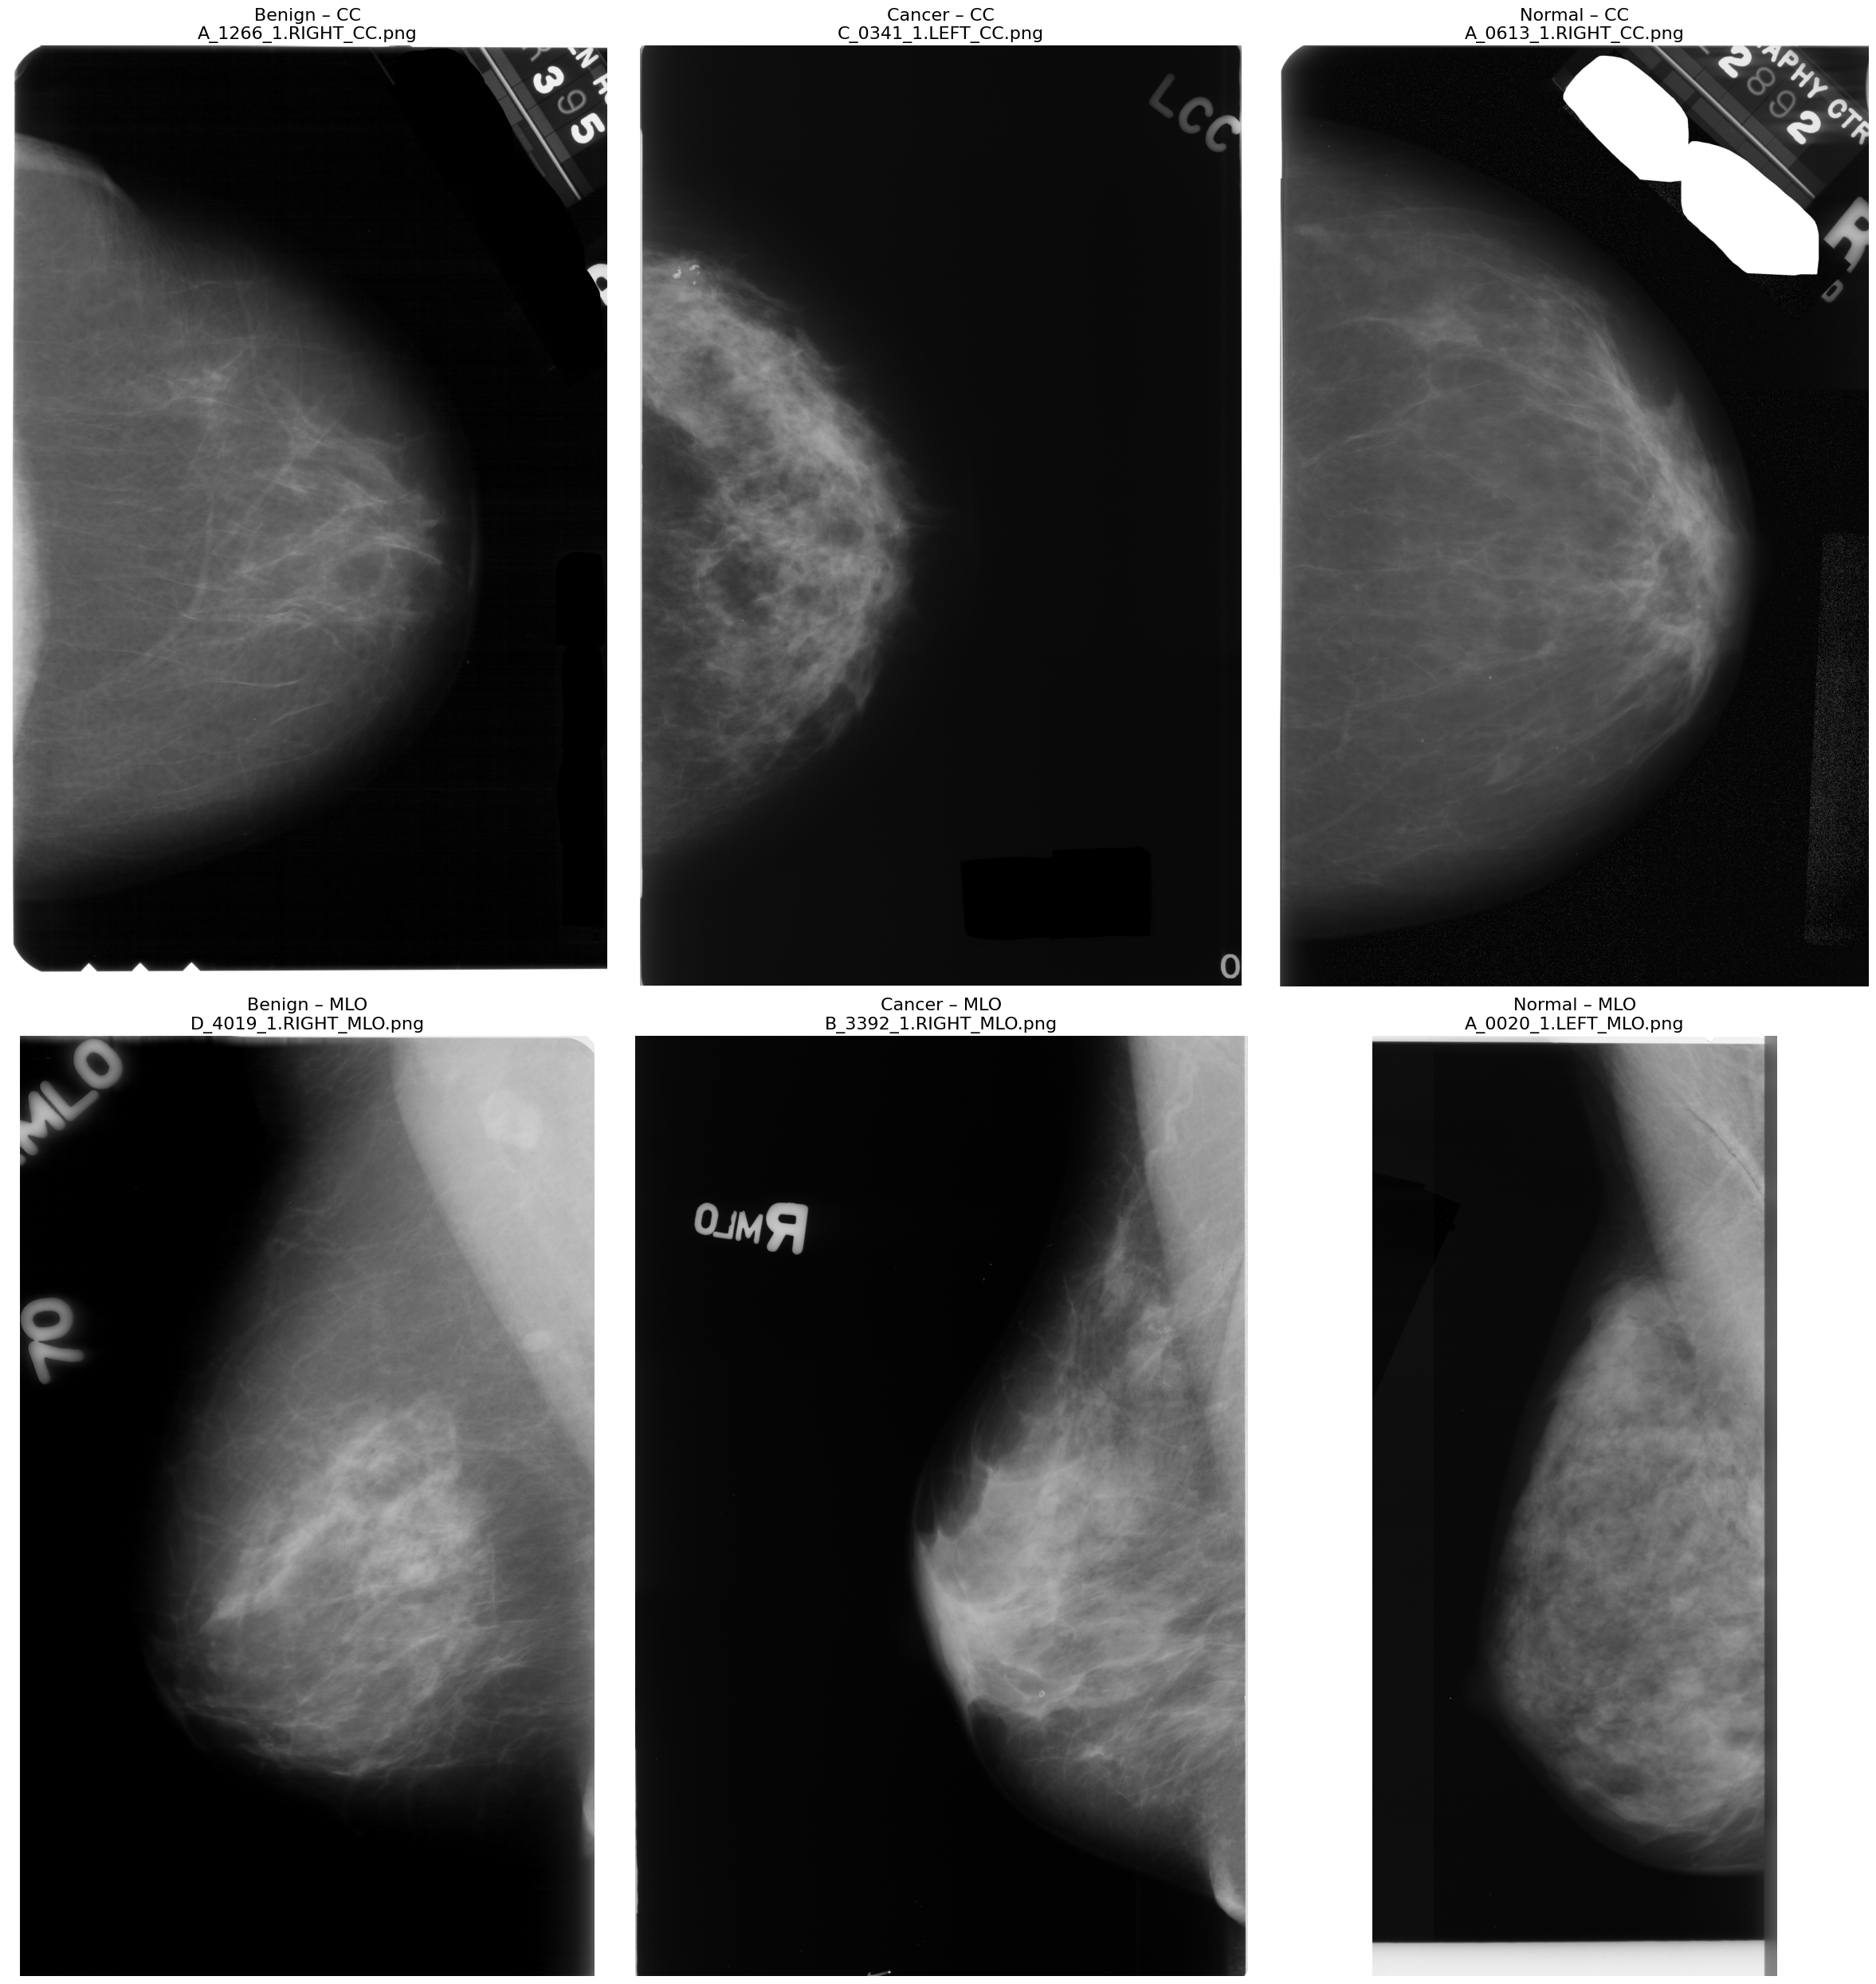

In [8]:
# Classification labels
classes = ['Benign', 'Cancer', 'Normal']

# Print number of .png images per class
for label in os.listdir(combined_img_dir):
    class_path = os.path.join(combined_img_dir, label)
    if os.path.isdir(class_path):
        image_list = [f for f in os.listdir(class_path) if f.lower().endswith('.png')]
        print(f"{label}: {len(image_list)} images")

# Creating figure for viewing
# 1 rows for viewing 'Benign', 'Cancer', 'Normal' CC images and 1 row for viewing 'Benign', 'Cancer', 'Normal' MLO images.
fig, axs = plt.subplots(2, len(classes), figsize=(24, 25))

for col, label in enumerate(classes):
    class_path = os.path.join(combined_img_dir, label)
    all_images = [f for f in os.listdir(class_path) if f.lower().endswith('.png')]

    # randomly picks one CC image
    cc_images = [f for f in all_images if '_CC.png' in f]
    if cc_images:
        cc_file = random.choice(cc_images)
        cc_path = os.path.join(class_path, cc_file)
        cc_img = cv2.imread(cc_path, cv2.IMREAD_GRAYSCALE)
        if cc_img is not None:
            axs[0, col].imshow(cc_img, cmap='gray')
            axs[0, col].set_title(f"{label} – CC\n{cc_file}", fontsize=16)
        else:
            axs[0, col].set_title(f"{label} – CC\n(Load failed)", fontsize=16)
    axs[0, col].axis('off')

    # randomly picks one MLO image
    mlo_images = [f for f in all_images if '_MLO.png' in f]
    if mlo_images:
        mlo_file = random.choice(mlo_images)
        mlo_path = os.path.join(class_path, mlo_file)
        mlo_img = cv2.imread(mlo_path, cv2.IMREAD_GRAYSCALE)
        if mlo_img is not None:
            axs[1, col].imshow(mlo_img, cmap='gray')
            axs[1, col].set_title(f"{label} – MLO\n{mlo_file}", fontsize=16)
        else:
            axs[1, col].set_title(f"{label} – MLO\n(Load failed)", fontsize=16)
    axs[1, col].axis('off')

plt.tight_layout()
plt.show()

The folders included 2 views for each breast, CC and MLO. The CC view presents a vertical (top down) perspective, displaying a larger portion of the whole breast, while the MLO view offers a lateral (side view) perspective of the breast, generally highlighting more of the upper outer area.

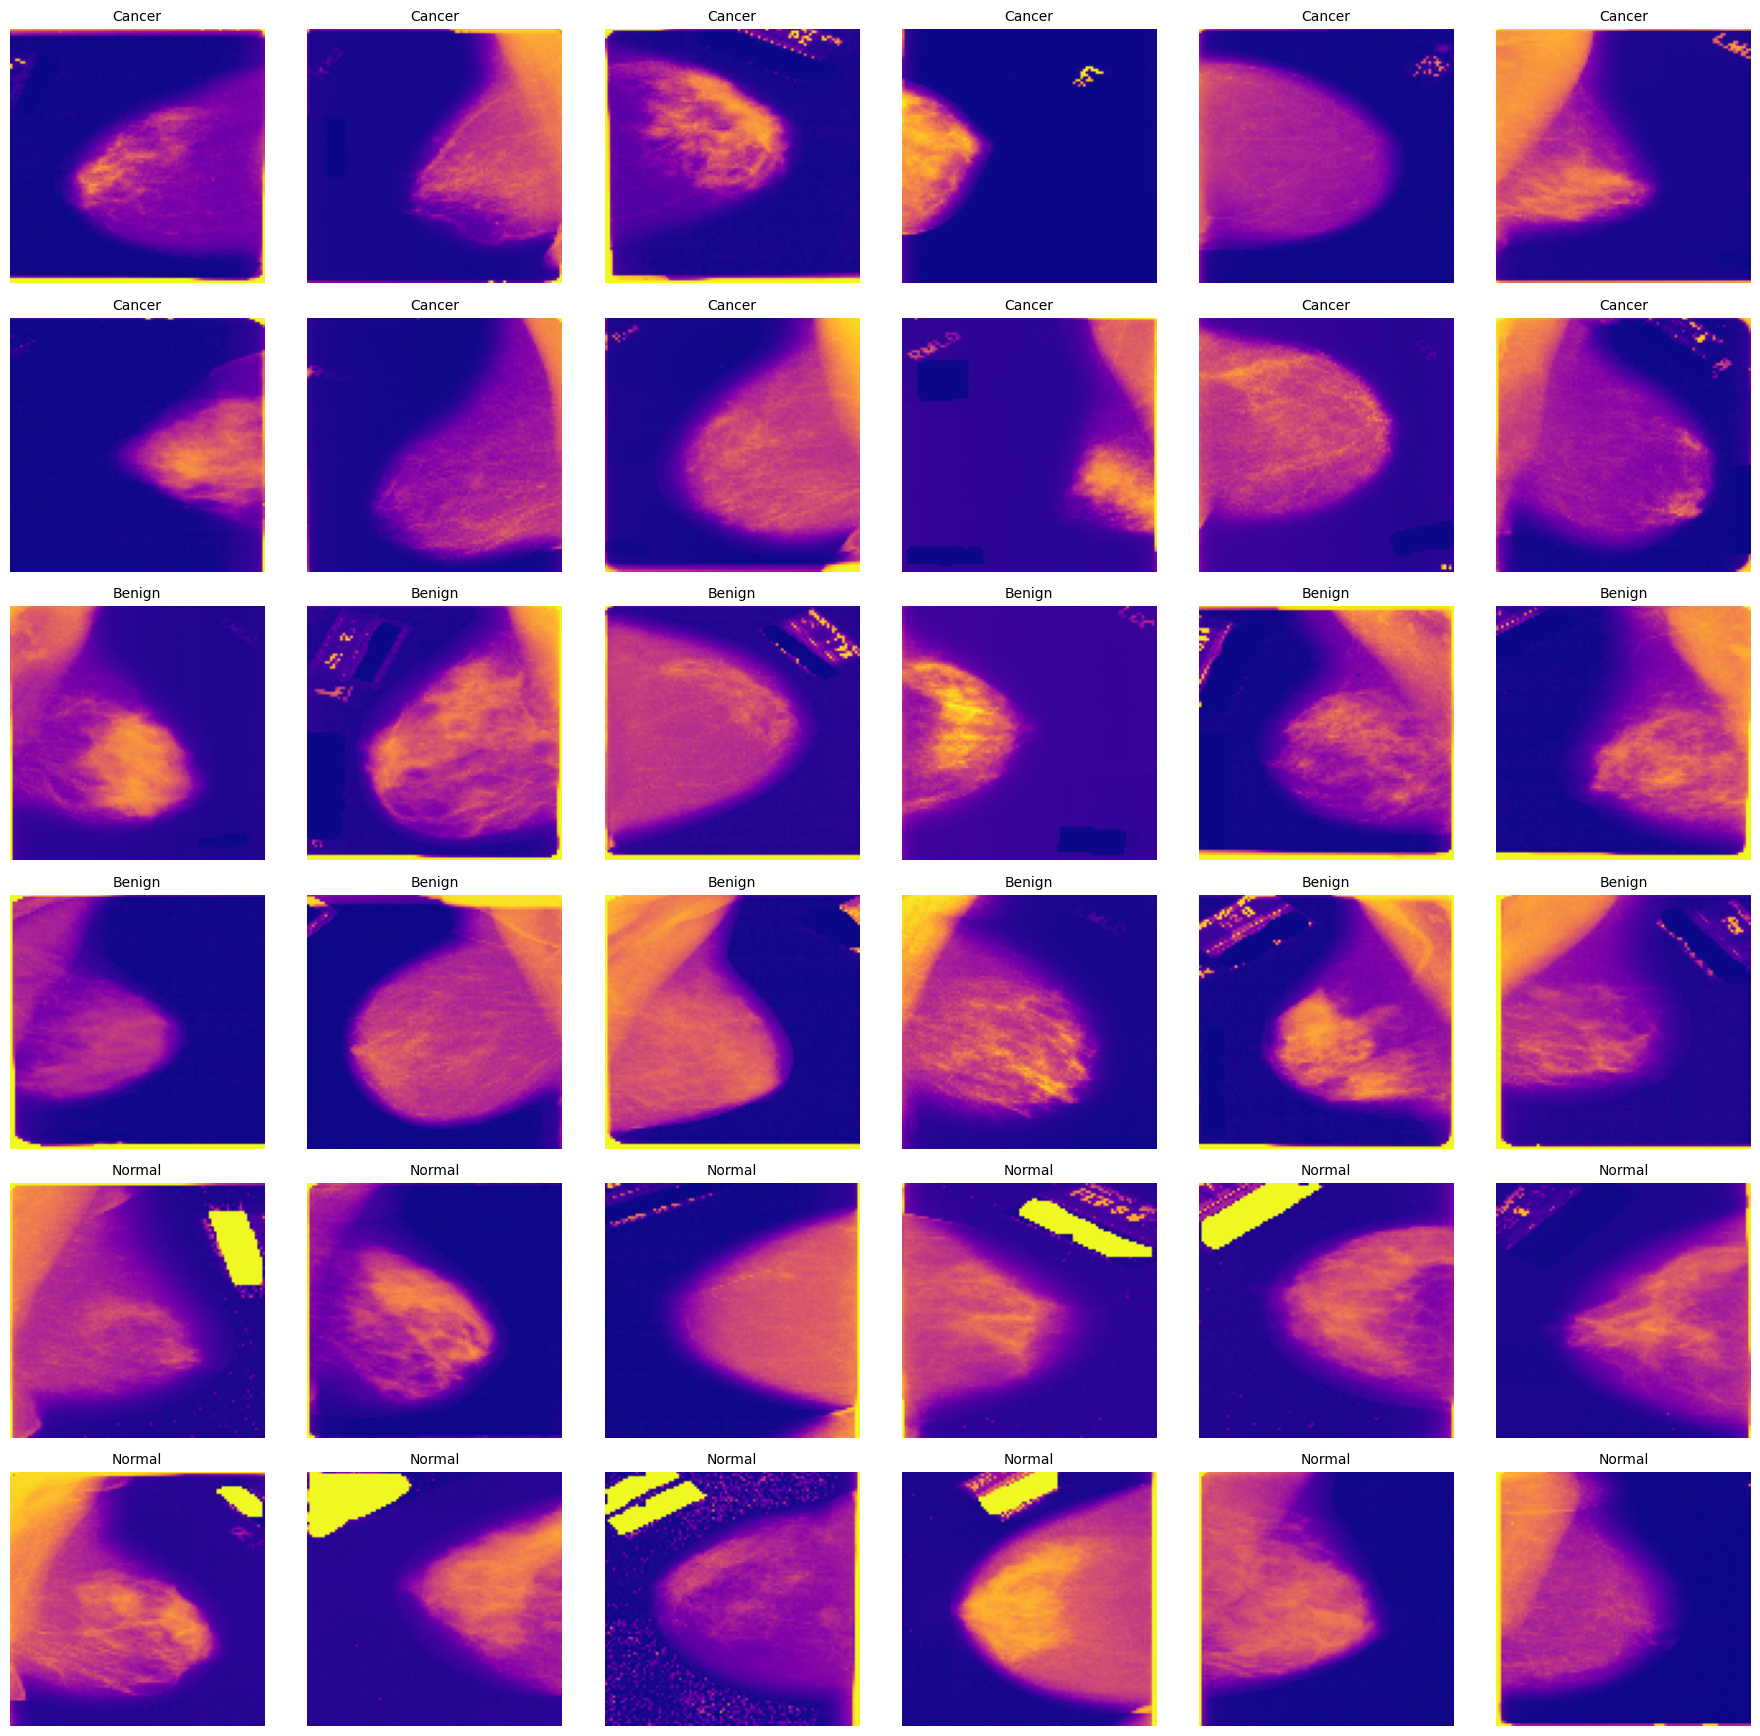

In [11]:
# Get images from 3 classes
cancer_imgs = glob.glob('Combined_MiniDDSM_imgs/Cancer/*.png')
benign_imgs = glob.glob('Combined_MiniDDSM_imgs/Benign/*.png')
normal_imgs = glob.glob('Combined_MiniDDSM_imgs/Normal/*.png')

# Sample 18 from each
some_can = np.random.choice(cancer_imgs, 18, replace=False)
some_ben = np.random.choice(benign_imgs, 18, replace=False)
some_nor = np.random.choice(normal_imgs, 18, replace=False)

# Create 6x6 grid showing the images
fig, axs = plt.subplots(6, 6, figsize=(18, 18))
classes = [('Cancer', some_can), ('Benign', some_ben), ('Normal', some_nor)]

for i, (label, images) in enumerate(classes):
    for j in range(18):
        row = (i * 2) + (j // 6 % 2)
        col = j % 6
        img = image.load_img(images[j], color_mode='grayscale', target_size=(100, 100))
        img_array = image.img_to_array(img).squeeze()

        axs[row, col].imshow(img_array, cmap='plasma')
        axs[row, col].axis('off')
        axs[row, col].set_title(label, fontsize=10)

plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

The grid above shows randomly selected samples of mammogram images from the Cancer, Benign, and Non-Cancer classes. These samples illustrate the visual intricacy and variability within classes, especially in cancerous cases.

### Preprocessing and Augmentation

Preprocessing and augmentation are being applied to improve generalization. Images are resized to 224×224 pixels with 32 images being processed per batch during training. Images are normalized to to [0.0, 1.0] and 20% of the data is reserved for validation and test. Augmentation was not done for validation and test set so that the model can be evaluated on unaltered images.

In [15]:
# 224×224 pixels input size
img_height, img_width = 224, 224
# Number of samples per batch
batch_size = 32

# preprocessing and augmentation for training set
train_data_generator = ImageDataGenerator(
    # Normalizing pixel values to [0, 1]
    rescale=1./255,
    # Randomly rotates images up to 15 degs
    rotation_range=15,
    # Randomly shifts images up to 10% of width horizontally
    width_shift_range=0.1,
    # Randomly shifts images up to 10% of height vertically
    height_shift_range=0.1,
    # Randomly zooms images up to 10%
    zoom_range=0.1,
    # False to retain left and right original views; no point flipping images horizontally or vertically
    horizontal_flip=False,
    vertical_flip=False,
    # This reserves 20% of data for validation
    validation_split=0.2
)

# preprocessing for validation and test set
# Normalizing pixel values to [0, 1]
test_data_generator = ImageDataGenerator(rescale=1./255)

### Train, Validation, Test Splitting

In [18]:
# training (80% of data)
training_set = train_data_generator.flow_from_directory(
    combined_img_dir,
    target_size=(img_height, img_width),
    color_mode='grayscale',
    batch_size=batch_size,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

# validation (20% of data)
validation_set = train_data_generator.flow_from_directory(
    combined_img_dir,
    target_size=(img_height, img_width),
    color_mode='grayscale',
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)

Found 6248 images belonging to 3 classes.
Found 1560 images belonging to 3 classes.


### Class Imbalance

After splitting training (80% of data) and validation (20% of data), class imbalance is addressed by adding class weights to prevent biasness. 

Training set class distribution count: {'Benign': np.int64(2148), 'Cancer': np.int64(2173), 'Normal': np.int64(1927)}


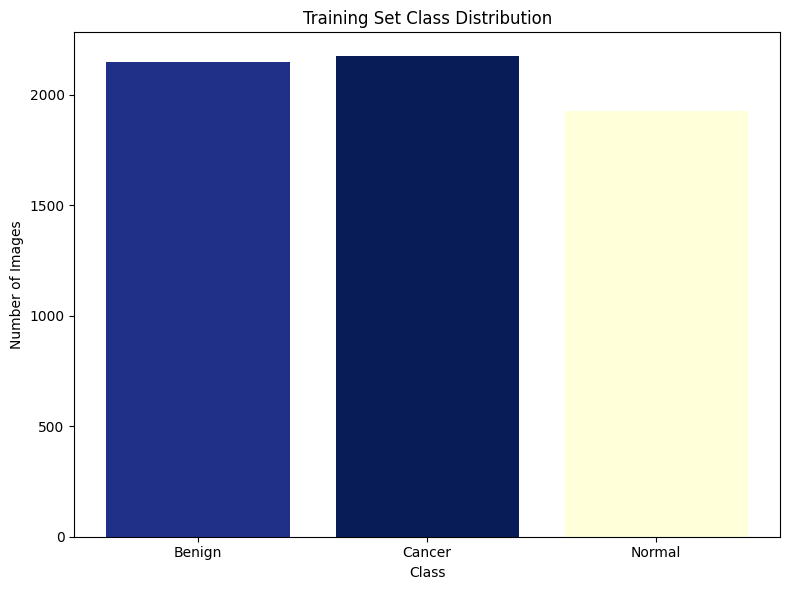

In [21]:
# class labels
labels = training_set.classes

# gets number of samples per class
unique, counts = np.unique(labels, return_counts=True)
print("Training set class distribution count:", dict(zip(training_set.class_indices, counts)))

# class names in order
class_names = list(training_set.class_indices.keys())

# color map and bar chart plotting
cmap = plt.get_cmap('YlGnBu')
norm = Normalize(vmin=min(counts), vmax=max(counts))
colors = [cmap(norm(count)) for count in counts]

plt.figure(figsize=(8, 6))
plt.bar(class_names, counts, color=colors)
plt.title("Training Set Class Distribution")
plt.xlabel("Class")
plt.ylabel("Number of Images")
plt.tight_layout()
plt.show()

In [23]:
class_weights = compute_class_weight(
    # Assigns weights inversely proportional to class frequencies
    class_weight='balanced',
    # Unique class labels
    classes=np.unique(labels),
    # The list of class labels
    y=labels
)

# Converts class weights to dictionary mapping class index to weight
class_weights_dict = dict(enumerate(class_weights))
print("Class weights:", class_weights_dict)

Class weights: {0: np.float64(0.9695841092489137), 1: np.float64(0.9584292069335788), 2: np.float64(1.0807818716485038)}


## Developing a model that does better than a baseline
### Naive Baseline Model

The naive baseline model acts as a basic reference for assessing more complex architectures later in the project. It utilizes a simple CNN architecture and incorporates class weighting to tackle class imbalance. Although straightforward, this model sets a baseline expected performance and aids in uncovering initial issues, like misclassification trends or sensitivity to underrepresented classes. 

In [27]:
naive_baseline_model = models.Sequential([
    # Models input size
    layers.Input(shape=(img_height, img_width, 1)),

    # 32 filters with 3×3 kernel and ReLU activation
    layers.Conv2D(32, (3, 3), activation='relu'),
    # MaxPooling2D(2, 2) downsamples the image by a factor of 2×2
    layers.MaxPooling2D(2, 2),

    # Filter is being increased to 64
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),

    # Filter is being increased to 128
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),

    layers.Flatten(),
    # Fully connected layer with 128 neurons
    layers.Dense(128, activation='relu'),
    # Randomly drops 50% of the nodes to minimize overfitting
    layers.Dropout(0.5),

    # Final layer for the 3-classes using softmax activation
    layers.Dense(3, activation='softmax')
], name="naive_baseline_model")

naive_baseline_model.compile(
    optimizer='adam',
    # categorical_crossentrop for multi-class classification with one-hot encoded labels
    loss='categorical_crossentropy',
    metrics=['accuracy'])

naive_baseline_model.summary()

Model: "naive_baseline_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    11,075,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,168,771 (42.61 MB)

 Trainable params: 11,168,771 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

In [29]:
naive_baseline_model_history = naive_baseline_model.fit(
    # Training data
    training_set,
    # Validation data
    validation_data=validation_set,
    # Number of Epochs
    epochs=20,
    # Class weights to address class imbalance
    class_weight=class_weights_dict
)

C:\Users\Shado\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 1341s 7s/step - accuracy: 0.4217 - loss: 24.5553 - val_accuracy: 0.4673 - val_loss: 0.9866
Epoch 2/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 870s 4s/step - accuracy: 0.5309 - loss: 0.9030 - val_accuracy: 0.4353 - val_loss: 1.1673
Epoch 3/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 585s 3s/step - accuracy: 0.5655 - loss: 0.8321 - val_accuracy: 0.3942 - val_loss: 1.3795
Epoch 4/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 587s 3s/step - accuracy: 0.5830 - loss: 0.8220 - val_accuracy: 0.4410 - val_loss: 1.0867
Epoch 5/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 604s 3s/step - accuracy: 0.5875 - loss: 0.8202 - val_accuracy: 0.4083 - val_loss: 1.3986
Epoch 6/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 595s 3s/step - accuracy: 0.6185 - loss: 0.7536 - val_accuracy: 0.4782 - val_loss: 1.1781
Epoch 7/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 599s 3s/step - accuracy: 0.6146 - loss: 0.7419 - val_accuracy: 0.4500 - val_loss: 1.1405
Epoch 8/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 593s 3s/step - accuracy: 0.6372 - loss: 0.6994 - val_ac

### Naive Baseline Model Evaluation

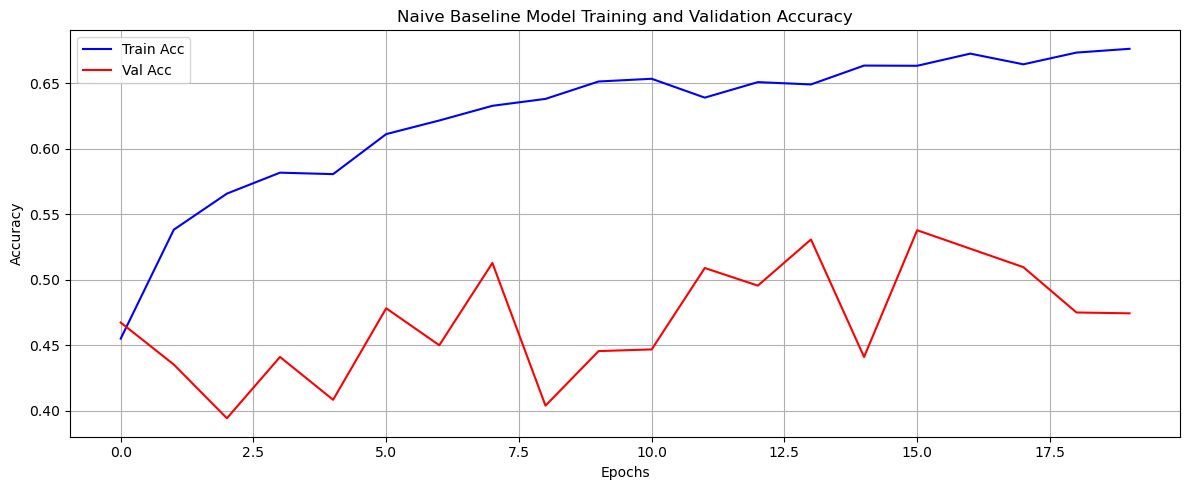

49/49 ━━━━━━━━━━━━━━━━━━━━ 119s 2s/step


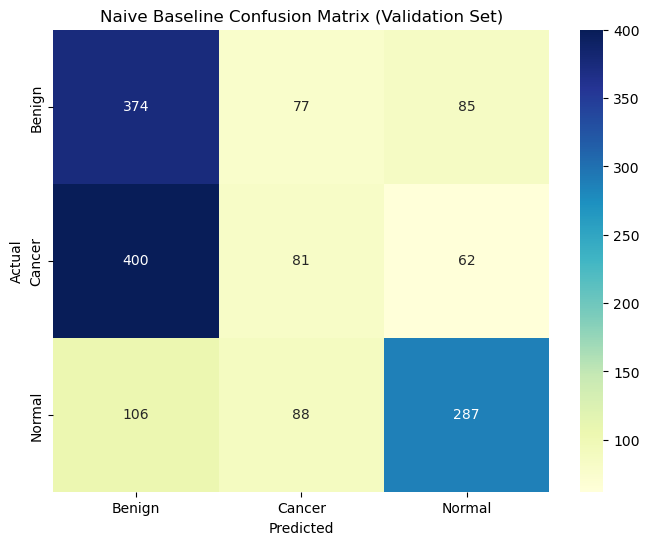

Naive Baseline Scores
              precision    recall  f1-score   support

      Benign       0.42      0.70      0.53       536
      Cancer       0.33      0.15      0.21       543
      Normal       0.66      0.60      0.63       481

    accuracy                           0.48      1560
   macro avg       0.47      0.48      0.45      1560
weighted avg       0.46      0.48      0.45      1560

Naive Baseline AUC-ROC (macro average): 0.6168780193044541


In [32]:
# Accuracy
plt.figure(figsize=(12, 5))
plt.plot(naive_baseline_model_history.history['accuracy'], 'b-', label='Train Acc')
plt.plot(naive_baseline_model_history.history['val_accuracy'], 'r-', label='Val Acc')
plt.title("Naive Baseline Model Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(loc='upper left')
plt.grid()
plt.tight_layout()
plt.show()

# This predicts labels for validation set
naive_baseline_model_Y_pred = naive_baseline_model.predict(validation_set)
naive_baseline_model_y_pred = np.argmax(naive_baseline_model_Y_pred, axis=1)
naive_baseline_model_y_true = validation_set.classes
naive_baseline_model_class_labels = list(validation_set.class_indices.keys())

# Confusion Matrix
naive_baseline_model_confusion_matrix = confusion_matrix(naive_baseline_model_y_true, naive_baseline_model_y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(naive_baseline_model_confusion_matrix, annot=True, fmt='d', xticklabels=naive_baseline_model_class_labels, yticklabels=naive_baseline_model_class_labels, cmap='YlGnBu')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Naive Baseline Confusion Matrix (Validation Set)')
plt.show()

# This prints classification Report for Precision, Sensitivity (Recall), F1-score
print("Naive Baseline Scores")
print(classification_report(naive_baseline_model_y_true, naive_baseline_model_y_pred, target_names=naive_baseline_model_class_labels,zero_division=0))

# Area Under the ROC Curve (AUC-ROC)
naive_baseline_model_y_true_binarized = label_binarize(naive_baseline_model_y_true, classes=[0, 1, 2])
naive_baseline_model_auc_roc = roc_auc_score(naive_baseline_model_y_true_binarized, naive_baseline_model_Y_pred, average='macro', multi_class='ovr')
print("Naive Baseline AUC-ROC (macro average):", naive_baseline_model_auc_roc)

The training and validation accuracy graphs indicate that the naive baseline model reached a maximum training accuracy of around 65%, while validation accuracy varied between 40% and 54% throughout the epochs. This suggests overfitting and uneven generalization. To tackle class imbalance, weights were used during training, resulting in a more balanced classification. The confusion matrix shows the model could identify all three classes to a certain degree.

Results show the Cancer class is the weakest, with an F1-score of 0.21 due to elevated misclassification. Overall, the model achieved an accuracy of 48%, a macro-averaged F1-score of 0.45, and a macro AUC-ROC of 0.62, indicating moderate discriminative capability beyond random chance.

Overall, the model faces considerable misclassifications between Benign and Cancer, which are more difficult to distinguish. Consequently, although the naive baseline provides a strong foundation, it still falls short. The next stage involves developing an enhanced baseline model with more sophisticated architectural elements and regularization methods to better capture underlying patterns and reduce overfitting.


### Baseline Model

The baseline model builds upon the naïve version by adding further improvements designed to enhance learning ability and generalization. Although still quite simple, the baseline model establishes a more solid and resilient benchmark.

Key modifications comprised incorporating Batch Normalization layers following each convolution to enhance and quicken training, utilizing padding='same' to maintain spatial dimensions, and implementing mild L2 regularization on the last convolutional layer to reduce overfitting. Moreover, Global Average Pooling took the place of Flatten() to lessen overfitting and enhance spatial generalization, and early stopping and model checkpointing were adopted to keep the best model and avoid redundant training.


In [35]:
baseline_model = models.Sequential([
    # Models input size
    layers.Input(shape=(img_height, img_width, 1)),

    # 32 filters with 3×3 kernel and ReLU activation
    layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    # MaxPooling2D(2, 2) downsamples the image by a factor of 2×2
    layers.MaxPooling2D(2, 2),

    # Filter is being increased to 64
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(2, 2),

    # Filter is being increased to 128 and adds L2 weight decay to penalize overly large weights and reduce overfitting
    layers.Conv2D(128, (3, 3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(0.001)),
    layers.BatchNormalization(),
    layers.MaxPooling2D(2, 2),

    # This replaces Flatten, averaging the spatial dimensions and reducing the number of parameters
    layers.GlobalAveragePooling2D(),

    # Fully connected layer with 128 neurons
    layers.Dense(128, activation='relu'),
    # Randomly drops 50% of the nodes to minimize overfitting
    layers.Dropout(0.5),

    # Final layer for the 3-classes using softmax activation
    layers.Dense(3, activation='softmax')
], name="baseline_model")

baseline_model.compile(
    optimizer='adam',
    # categorical_crossentrop for multi-class classification with one-hot encoded labels
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

baseline_model.summary()

Model: "baseline_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 224, 224, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 224, 224, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 112, 112, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 112, 112, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 56, 56, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 128)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 110,467 (431.51 KB)

 Trainable params: 110,019 (429.76 KB)

 Non-trainable params: 448 (1.75 KB)

In [43]:
# Early stopping to stop training if no changes after consecutive epochs
early_stopping = callbacks.EarlyStopping(patience=5, restore_best_weights=True)
# checkpoint acts as a save file to restore best model weights from training
checkpoint = callbacks.ModelCheckpoint('baseline_model.keras', save_best_only=True)

baseline_model_history = baseline_model.fit(
    # Training data
    training_set,
    # Validation data
    validation_data=validation_set,
    # Number of Epochs
    epochs=30,
    # Class weights to address class imbalance
    class_weight=class_weights_dict,
    callbacks=[early_stopping, checkpoint]
)

Epoch 1/30
196/196 ━━━━━━━━━━━━━━━━━━━━ 736s 4s/step - accuracy: 0.6595 - loss: 0.6643 - val_accuracy: 0.4840 - val_loss: 1.9804
Epoch 2/30
196/196 ━━━━━━━━━━━━━━━━━━━━ 763s 4s/step - accuracy: 0.6648 - loss: 0.6546 - val_accuracy: 0.3327 - val_loss: 3.8881
Epoch 3/30
196/196 ━━━━━━━━━━━━━━━━━━━━ 747s 4s/step - accuracy: 0.6810 - loss: 0.6329 - val_accuracy: 0.2301 - val_loss: 1.4522
Epoch 4/30
196/196 ━━━━━━━━━━━━━━━━━━━━ 773s 4s/step - accuracy: 0.6634 - loss: 0.6498 - val_accuracy: 0.2904 - val_loss: 1.8383
Epoch 5/30
196/196 ━━━━━━━━━━━━━━━━━━━━ 776s 4s/step - accuracy: 0.6710 - loss: 0.6518 - val_accuracy: 0.3038 - val_loss: 1.9676
Epoch 6/30
196/196 ━━━━━━━━━━━━━━━━━━━━ 752s 4s/step - accuracy: 0.6835 - loss: 0.6415 - val_accuracy: 0.4596 - val_loss: 1.2841
Epoch 7/30
196/196 ━━━━━━━━━━━━━━━━━━━━ 671s 3s/step - accuracy: 0.6773 - loss: 0.6504 - val_accuracy: 0.4494 - val_loss: 1.3892
Epoch 8/30
196/196 ━━━━━━━━━━━━━━━━━━━━ 676s 3s/step - accuracy: 0.6751 - loss: 0.6398 - val_accu

### Baseline Model Evaluation

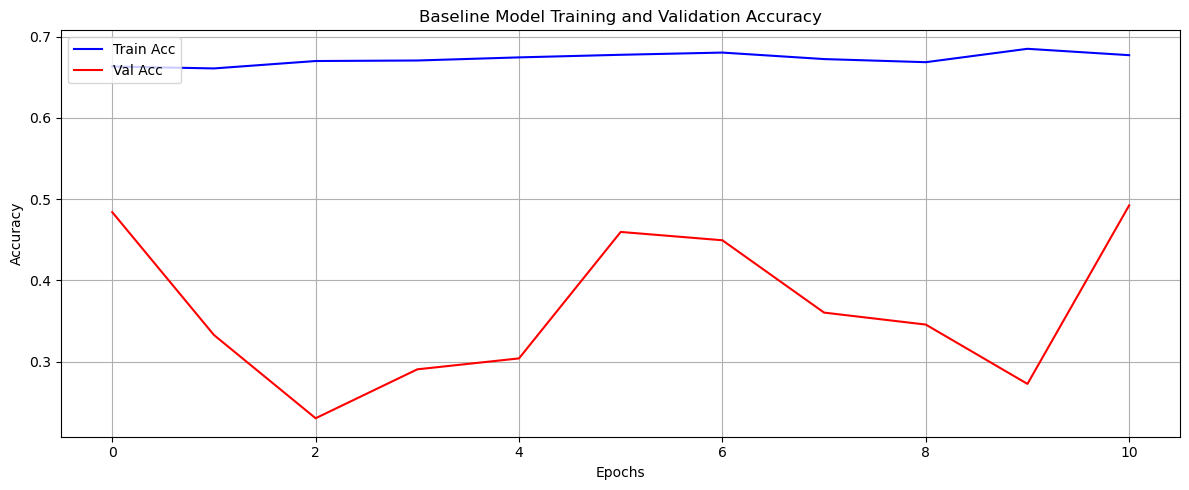

49/49 ━━━━━━━━━━━━━━━━━━━━ 123s 2s/step


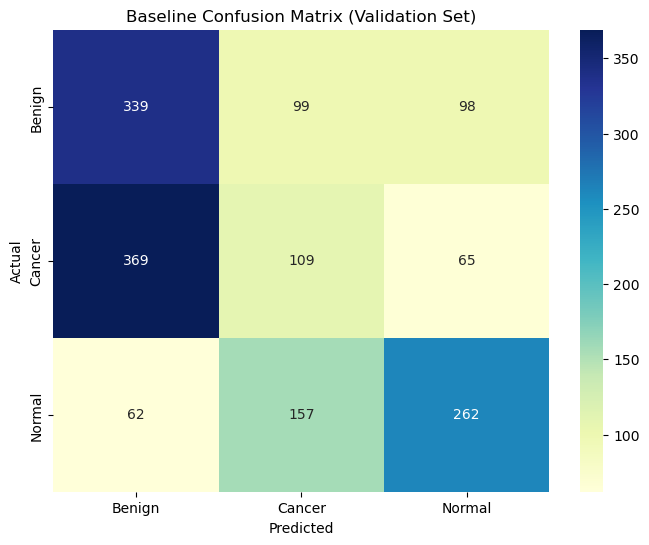

Baseline Model Scores
              precision    recall  f1-score   support

      Benign       0.44      0.63      0.52       536
      Cancer       0.30      0.20      0.24       543
      Normal       0.62      0.54      0.58       481

    accuracy                           0.46      1560
   macro avg       0.45      0.46      0.45      1560
weighted avg       0.45      0.46      0.44      1560

Baseline AUC-ROC (macro average): 0.5815512748174277


In [45]:
# Accuracy
plt.figure(figsize=(12, 5))
plt.plot(baseline_model_history.history['accuracy'], 'b-', label='Train Acc')
plt.plot(baseline_model_history.history['val_accuracy'], 'r-', label='Val Acc')
plt.title("Baseline Model Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(loc='upper left')
plt.grid()
plt.tight_layout()
plt.show()

# This predicts labels for validation set
baseline_Y_pred = baseline_model.predict(validation_set)
baseline_y_pred = np.argmax(baseline_Y_pred, axis=1)
baseline_y_true = validation_set.classes
baseline_class_labels = list(validation_set.class_indices.keys())

# Confusion Matrix
baseline_confusion_matrix = confusion_matrix(baseline_y_true, baseline_y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(baseline_confusion_matrix, annot=True, fmt='d', xticklabels=baseline_class_labels, yticklabels=baseline_class_labels, cmap='YlGnBu')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Baseline Confusion Matrix (Validation Set)')
plt.show()

# This prints classification Report for Precision, Sensitivity (Recall), F1-score
print("Baseline Model Scores")
print(classification_report(baseline_y_true, baseline_y_pred, target_names=baseline_class_labels, zero_division=0))

# Area Under the ROC Curve (AUC-ROC)
baseline_y_true_binarized = label_binarize(baseline_y_true, classes=[0, 1, 2])
baseline_auc_roc = roc_auc_score(baseline_y_true_binarized, baseline_Y_pred, average='macro', multi_class='ovr')
print("Baseline AUC-ROC (macro average):", baseline_auc_roc)

The baseline model training and validation accuracy plots illustrate that the model consistently achieved a high and steady training accuracy of approximately 67%, whereas the validation accuracy exhibited considerable fluctuations, varying between 24% and 50%. This significant difference shows that overfitting continues to be a problem, even with modifications to the architecture and early stopping techniques.

The confusion matrix shows that each of the three classes was identified to different degrees. The model recorded its highest recall (0.63) for the Benign class and the top F1-score (0.58) for the Normal class. Nonetheless, it persisted in having difficulty accurately identifying Cancer cases, reaching merely 0.20 recall and 0.24 F1-score. The prevalence of misclassifications between Benign and Cancer highlights the challenge in differentiating between these two visually alike groups. The model recorded an overall accuracy of 46%, a macro-averaged F1-score of 0.45, and a macro AUC-ROC of 0.58, which is somewhat less than the naive baseline’s AUC-ROC. These findings indicate that although the model has improved in recognizing benign and normal patterns, its capacity to identify cancer continues to be inadequate.



## Scaling up: developing a model that overfits

Understanding the intricacies required to align the data is vital for determining appropriate model architecture and regularization techniques. The overfitting model assists us in identifying the point when the model becomes overly intricate and starts to overfit, which helps in choosing regularization techniques. The epochs were set to 50, and larger filter sizes were employed to achieve overfitting.

### Overfitting Model

In [25]:
# This is the overfitting model without dropout and regularization
overfitting_model = models.Sequential([
    # Models input size
    layers.Input(shape=(img_height, img_width, 1)),

    # 64 filters with 3×3 kernel and ReLU activation
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    # MaxPooling2D(2, 2) downsamples the image by a factor of 2×2
    layers.MaxPooling2D(2, 2),

    # Filter is being increased to 128
    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(2, 2),

    # Filter is being increased to 256
    layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(2, 2),

    # This replaces Flatten, averaging the spatial dimensions and reducing the number of parameters
    layers.GlobalAveragePooling2D(),

    # Fully connected layer with 512 neurons
    layers.Dense(512, activation='relu'),
    # Final layer for the 3-classes using softmax activation
    layers.Dense(3, activation='softmax')
], name="overfitting_model")

overfitting_model.compile(
    optimizer='adam',
    # categorical_crossentrop for multi-class classification with one-hot encoded labels
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

overfitting_model.summary()

Model: "overfitting_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 224, 224, 64)   │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 224, 224, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 224, 224, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 112, 112, 128)  │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 112, 112, 128)  │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 56, 56, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 56, 56, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 256)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │         1,539 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,280,963 (4.89 MB)

 Trainable params: 1,279,171 (4.88 MB)

 Non-trainable params: 1,792 (7.00 KB)

In [27]:
# Early stopping to stop training if no changes after consecutive epochs
early_stopping = callbacks.EarlyStopping(patience=5, restore_best_weights=True)
# checkpoint acts as a save file to restore best model weights from training
checkpoint = callbacks.ModelCheckpoint('overfitting_model.keras', save_best_only=True)

overfitting_model_history = overfitting_model.fit(
    # Training data
    training_set,
    # Validation data
    validation_data=validation_set,
    # epochs changed fom 30 to 50 for overfitting
    epochs=50,
    # Class weights to address class imbalance
    class_weight=class_weights_dict,
    callbacks=[early_stopping]
)

C:\Users\Shado\anaconda3\envs\tf_env\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 1418s 7s/step - accuracy: 0.5689 - loss: 0.8171 - val_accuracy: 0.3038 - val_loss: 1.7918
Epoch 2/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 1326s 7s/step - accuracy: 0.6234 - loss: 0.6952 - val_accuracy: 0.3487 - val_loss: 4.4364
Epoch 3/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 1337s 7s/step - accuracy: 0.6414 - loss: 0.6679 - val_accuracy: 0.3974 - val_loss: 5.2654
Epoch 4/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 1315s 7s/step - accuracy: 0.6478 - loss: 0.6750 - val_accuracy: 0.3090 - val_loss: 1.3252
Epoch 5/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 1429s 7s/step - accuracy: 0.6321 - loss: 0.6860 - val_accuracy: 0.3500 - val_loss: 6.6782
Epoch 6/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 1334s 7s/step - accuracy: 0.6650 - loss: 0.6349 - val_accuracy: 0.3474 - val_loss: 9.2504
Epoch 7/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 1337s 7s/step - accuracy: 0.6745 - loss: 0.6212 - val_accuracy: 0.3551 - val_loss: 6.8466
Epoch 8/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 1345s 7s/step - accuracy: 0.6859 - loss: 0.6187 - 

### Overfitting Model Evaluation

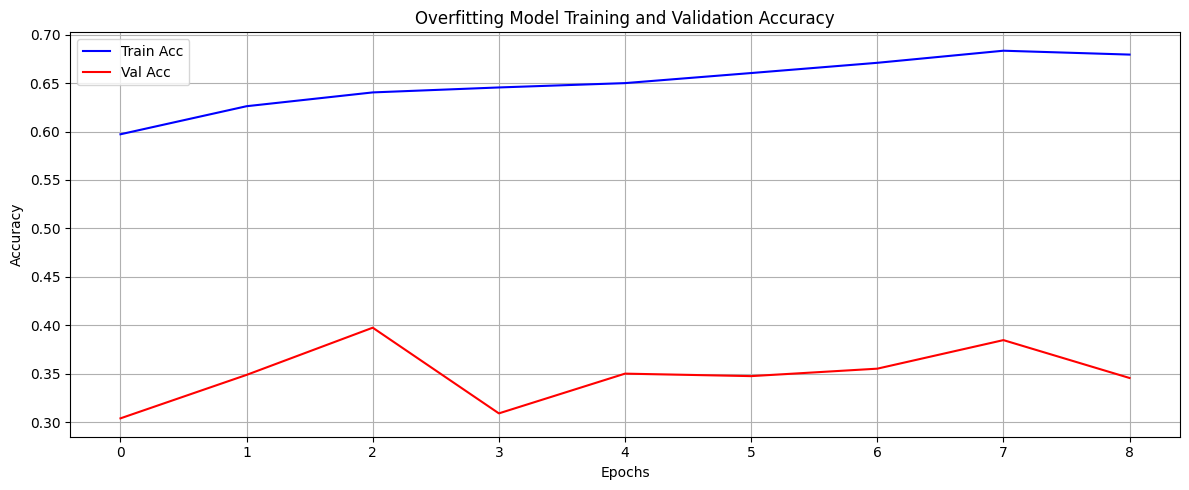

49/49 ━━━━━━━━━━━━━━━━━━━━ 289s 6s/step


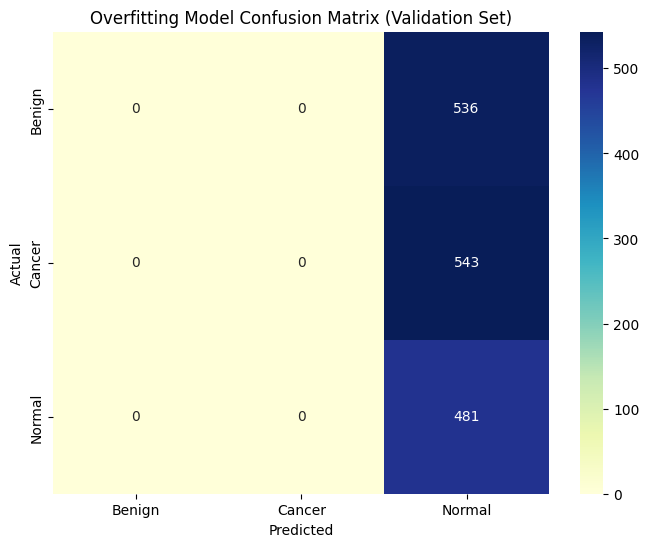

Overfitting Model Scores
              precision    recall  f1-score   support

      Benign       0.00      0.00      0.00       536
      Cancer       0.00      0.00      0.00       543
      Normal       0.31      1.00      0.47       481

    accuracy                           0.31      1560
   macro avg       0.10      0.33      0.16      1560
weighted avg       0.10      0.31      0.15      1560

Overfitting Model AUC-ROC (macro average): 0.6539354826072193


In [31]:
# Accuracy
plt.figure(figsize=(12, 5))
plt.plot(overfitting_model_history.history['accuracy'], 'b-', label='Train Acc')
plt.plot(overfitting_model_history.history['val_accuracy'], 'r-', label='Val Acc')
plt.title("Overfitting Model Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(loc='upper left')
plt.grid()
plt.tight_layout()
plt.show()

# This predicts labels for validation set
overfitting_Y_pred = overfitting_model.predict(validation_set)
overfitting_y_pred = np.argmax(overfitting_Y_pred, axis=1)
overfitting_y_true = validation_set.classes
overfitting_class_labels = list(validation_set.class_indices.keys())

# Confusion Matrix
overfitting_confusion_matrix = confusion_matrix(overfitting_y_true, overfitting_y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(overfitting_confusion_matrix, annot=True, fmt='d', xticklabels=overfitting_class_labels, yticklabels=overfitting_class_labels, cmap='YlGnBu')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Overfitting Model Confusion Matrix (Validation Set)')
plt.show()

# This prints classification Report for Precision, Sensitivity (Recall), F1-score
print("Overfitting Model Scores")
print(classification_report(overfitting_y_true, overfitting_y_pred, target_names=overfitting_class_labels, zero_division=0))

# Area Under the ROC Curve (AUC-ROC)
overfitting_y_true_binarized = label_binarize(overfitting_y_true, classes=[0, 1, 2])
overfitting_auc_roc = roc_auc_score(overfitting_y_true_binarized, overfitting_Y_pred, average='macro', multi_class='ovr')
print("Overfitting Model AUC-ROC (macro average):", overfitting_auc_roc)

The overfitting model reached a notable training accuracy of around 68%, but validation accuracy remained low, ranging from 31% to 39% throughout. This significant difference suggests extreme overfitting, as the model retains the training data yet does not apply to unfamiliar validation data.

Class weights were implemented, but the model did not utilize them effectively, as indicated by the confusion matrix, which showed that all validation samples were categorized as Normal regardless of their true class. Consequently, both the Benign and Cancer categories achieved zero recall and F1-scores, whereas the Normal category reached a recall of 1.00 and an F1-score of 0.47, solely because of the classifier’s inclination towards dominant predictions. The model attained AUC-ROC macro average 0.65, indicating the model's effectiveness in ranking predictions accurately, even with misclassifications.

These results highlight the limitations of the current configuration, emphasizing the need for stricter regularization and architectural adjustments. The findings reaffirm the importance of addressing overfitting explicitly before progressing to further enhancements.



## Regularizing model and tuning hyperparameters

### Stratified K-fold Cross Validation

Stratified K-fold Cross-Validation was applied pre regularized model implementation to guarantee a thorough and equitable assessment while preserving class distribution among folds, offering insight into the stability and generalization ability of the baseline model before implementing advanced regularization and hyperparameter optimization.

In [26]:
# This is for numpy arrays for images and labels
data_dir = 'Combined_MiniDDSM_imgs'
classes = ['Benign', 'Cancer', 'Normal']
# img_height and img_width remains same, 224, 224, note to self: maybe increase them to cover the breast cancer areas?
img_height, img_width = 224, 224

X = []
y = []

# This loops through the class directory and load grayscale images
for idx, label in enumerate(classes):
    class_dir = os.path.join(data_dir, label)
    for file in tqdm(os.listdir(class_dir), desc=f"Loading {label}"):
        if file.endswith('.png'):
            # load grayscale images then resize them
            img = cv2.imread(os.path.join(class_dir, file), cv2.IMREAD_GRAYSCALE)
            img = cv2.resize(img, (img_width, img_height))
            
            # This normalizes pixel values to 0,1
            img = img.astype('float32') / 255.0
            
            # This adds image to feature list than add label index to label list
            X.append(img)
            y.append(idx)

# This adds channel dimension shape (N, 224, 224, 1) then converts the labels to numpy array: shape (N,)
X = np.expand_dims(np.array(X), -1)
y = np.array(y)  # Shape: (N,)

Loading Normal: 100%|██████████| 2408/2408 [03:58<00:00, 10.09it/s]


### Stratified K-fold Cross Validation on Baseline Model

In [32]:
# This is the Class-wise stratified K-Fold cross-validator from sklearn
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# This clears the list before running folds, in case of re-running the folds, it will accumulate results across repeated runs if not cleared
fold_accuracies = []
fold_aucs = []
fold_losses = []

print(f"Cleared")

Cleared


In [34]:
# This will start the K-Fold Cross Validation folding
for fold, (train_idx, val_idx) in enumerate(skf.split(X, y)):
    print(f"\nFold {fold + 1}")

    # This splits the dataset using the fold indices
    X_train, X_val = X[train_idx], X[val_idx]
    y_train, y_val = y[train_idx], y[val_idx]

    # This will 1-hot encode labels for the categorical crossentropy
    y_train_cat = to_categorical(y_train, num_classes=3)
    y_val_cat = to_categorical(y_val, num_classes=3)

    # Note that this is from the baseline model
    fold_model = models.Sequential([
        # Models input size
        layers.Input(shape=(img_height, img_width, 1)),

        # 32 filters with 3×3 kernel and ReLU activation
        layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        # MaxPooling2D(2, 2) downsamples the image by a factor of 2×2
        layers.MaxPooling2D(2, 2),

        # Filter is being increased to 64
        layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D(2, 2),

        # Filter is being increased to 128 and adds L2 weight decay to penalize overly large weights and reduce overfitting
        layers.Conv2D(128, (3, 3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(0.001)),
        layers.BatchNormalization(),
        layers.MaxPooling2D(2, 2),

        # This replaces Flatten, averaging the spatial dimensions and reducing the number of parameters
        layers.GlobalAveragePooling2D(),

        # Fully connected layer with 128 neurons
        layers.Dense(128, activation='relu'),
        # Randomly drops 50% of the nodes to minimize overfitting
        layers.Dropout(0.5),

        # Final layer for the 3-classes using softmax activation
        layers.Dense(3, activation='softmax')
    ])

    fold_model.compile(
        optimizer='adam',
        # categorical_crossentrop for multi-class classification with one-hot encoded labels
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )

    # Early stopping to stop training if no changes after consecutive epochs
    early_stopping = callbacks.EarlyStopping(patience=5, restore_best_weights=True)

    k_fold_baseline_history = fold_model.fit(
        # Training data
        X_train, y_train_cat,
        # Validation data
        validation_data=(X_val, y_val_cat),
        # Number of Epochs
        epochs=30,
        # Class weights to address class imbalance
        class_weight=class_weights_dict,
        batch_size=32,
        callbacks=[early_stopping],
        verbose=1
    )

    # This is the evaluation section
    val_loss, val_accuracy = fold_model.evaluate(X_val, y_val_cat, verbose=0)
    # This savea accuracy and loss
    fold_accuracies.append(val_accuracy)
    fold_losses.append(val_loss)

    # This predicts the class probabilities for AUC-ROC
    y_val_pred_probs = fold_model.predict(X_val)
    
    # This binarizes ground truth labels then compute AUC-ROC
    y_val_bin = label_binarize(y_val, classes=[0, 1, 2])
    auc = roc_auc_score(y_val_bin, y_val_pred_probs, average='macro', multi_class='ovr')
    fold_aucs.append(auc)

    # This print out a result summary of each fold
    print(f"Fold {fold + 1} results summary:")
    print(f"Accuracy: {val_accuracy:.4f}, Loss: {val_loss:.4f}, AUC-ROC: {auc:.4f}")


Fold 1
Epoch 1/30
196/196 ━━━━━━━━━━━━━━━━━━━━ 139s 694ms/step - accuracy: 0.5436 - loss: 0.9800 - val_accuracy: 0.5134 - val_loss: 1.3007
Epoch 2/30
196/196 ━━━━━━━━━━━━━━━━━━━━ 118s 604ms/step - accuracy: 0.5956 - loss: 0.8379 - val_accuracy: 0.4085 - val_loss: 1.3217
Epoch 3/30
196/196 ━━━━━━━━━━━━━━━━━━━━ 118s 600ms/step - accuracy: 0.6304 - loss: 0.7752 - val_accuracy: 0.5314 - val_loss: 1.0522
Epoch 4/30
196/196 ━━━━━━━━━━━━━━━━━━━━ 117s 597ms/step - accuracy: 0.6343 - loss: 0.7570 - val_accuracy: 0.3976 - val_loss: 1.4200
Epoch 5/30
196/196 ━━━━━━━━━━━━━━━━━━━━ 139s 582ms/step - accuracy: 0.6326 - loss: 0.7487 - val_accuracy: 0.4168 - val_loss: 1.2672
Epoch 6/30
196/196 ━━━━━━━━━━━━━━━━━━━━ 119s 606ms/step - accuracy: 0.6446 - loss: 0.7362 - val_accuracy: 0.5544 - val_loss: 0.9606
Epoch 7/30
196/196 ━━━━━━━━━━━━━━━━━━━━ 117s 597ms/step - accuracy: 0.6412 - loss: 0.7266 - val_accuracy: 0.6255 - val_loss: 0.8426
Epoch 8/30
196/196 ━━━━━━━━━━━━━━━━━━━━ 117s 598ms/step - accuracy: 

### Stratified K-fold Cross Validation Baseline Model Result Summary

In [36]:
print("Stratified K-Fold Cross-Validation Baseline Result Sumary")
print(f"Mean Accuracy: {np.mean(fold_accuracies):.4f} ± {np.std(fold_accuracies):.4f}")
print(f"Mean Loss: {np.mean(fold_losses):.4f} ± {np.std(fold_losses):.4f}")
print(f"Mean AUC-ROC: {np.mean(fold_aucs):.4f} ± {np.std(fold_aucs):.4f}")

Stratified K-Fold Cross-Validation Baseline Result Sumary
Mean Accuracy: 0.6401 ± 0.0112
Mean Loss: 0.7628 ± 0.0386
Mean AUC-ROC: 0.8271 ± 0.0184


### Stratified K-fold Cross Validation for Regularized Model

In [38]:
# This is the Class-wise stratified K-Fold cross-validator from sklearn
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# This clears the list before running folds, in case of re-running the folds, it will accumulate results across repeated runs if not cleared
fold_accuracies = []
fold_aucs = []
fold_losses = []

print(f"Cleared")

Cleared


In [40]:
# This will start the K-Fold Cross Validation folding
for fold, (train_idx, val_idx) in enumerate(skf.split(X, y)):
    print(f"\nFold {fold + 1}")

    # This splits the dataset using the fold indices
    X_train, X_val = X[train_idx], X[val_idx]
    y_train, y_val = y[train_idx], y[val_idx]

    # This will 1-hot encode labels for the categorical crossentropy
    y_train_cat = to_categorical(y_train, num_classes=3)
    y_val_cat = to_categorical(y_val, num_classes=3)

    # regularized model layers
    fold_model = models.Sequential([
        # Models input size
        layers.Input(shape=(img_height, img_width, 1), name='input_layer'),
    
        # 32 filters with 3×3 kernel and ReLU activation and L2 weight decay to penalize overly large weights and reduce overfitting
        layers.Conv2D(32, (3, 3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(0.001)),
        layers.BatchNormalization(),
        layers.MaxPooling2D(2, 2),
        # This SpatialDropout2D is added, increasingly as well, to each pooling layer to encourage robustness in spatial feature learning
        layers.SpatialDropout2D(0.2),
    
        # Filter is being increased to 64
        layers.Conv2D(64, (3, 3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(0.001)),
        layers.BatchNormalization(),
        layers.MaxPooling2D(2, 2),
        layers.SpatialDropout2D(0.2),
    
        # Filter is being increased to 128
        layers.Conv2D(128, (3, 3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(0.001)),
        layers.BatchNormalization(),
        layers.MaxPooling2D(2, 2),
        layers.SpatialDropout2D(0.3),
    
        # This replaces Flatten, averaging the spatial dimensions and reducing the number of parameters
        layers.GlobalAveragePooling2D(),
    
        # Fully connected layer with 128 neurons
        layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
        # Randomly drops 50% of the nodes to minimize overfitting
        layers.Dropout(0.5),
    
        # Final layer for the 3-classes using softmax activation
        layers.Dense(3, activation='softmax')
    ])

    fold_model.compile(
        optimizer='adam',
        # categorical_crossentrop for multi-class classification with one-hot encoded labels
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )

    # Early stopping to stop training if no changes after consecutive epochs
    early_stopping = callbacks.EarlyStopping(patience=5, restore_best_weights=True)

    k_fold_regularized_history = fold_model.fit(
        # Training data
        X_train, y_train_cat,
        # Validation data
        validation_data=(X_val, y_val_cat),
        # Number of Epochs
        epochs=30,
        # Class weights to address class imbalance
        class_weight=class_weights_dict,
        batch_size=32,
        callbacks=[early_stopping],
        verbose=1
    )

    # This is the evaluation section
    val_loss, val_accuracy = fold_model.evaluate(X_val, y_val_cat, verbose=0)
    # This savea accuracy and loss
    fold_accuracies.append(val_accuracy)
    fold_losses.append(val_loss)

    # This predicts the class probabilities for AUC-ROC
    y_val_pred_probs = fold_model.predict(X_val)
    
    # This binarizes ground truth labels then compute AUC-ROC
    y_val_bin = label_binarize(y_val, classes=[0, 1, 2])
    auc = roc_auc_score(y_val_bin, y_val_pred_probs, average='macro', multi_class='ovr')
    fold_aucs.append(auc)

    # This print out a result summary of each fold
    print(f"Fold {fold + 1} results summary:")
    print(f"Accuracy: {val_accuracy:.4f}, Loss: {val_loss:.4f}, AUC-ROC: {auc:.4f}")


Fold 1
Epoch 1/30
196/196 ━━━━━━━━━━━━━━━━━━━━ 121s 594ms/step - accuracy: 0.4501 - loss: 1.3019 - val_accuracy: 0.3438 - val_loss: 1.4889
Epoch 2/30
196/196 ━━━━━━━━━━━━━━━━━━━━ 117s 596ms/step - accuracy: 0.5511 - loss: 1.0736 - val_accuracy: 0.4334 - val_loss: 1.3394
Epoch 3/30
196/196 ━━━━━━━━━━━━━━━━━━━━ 119s 606ms/step - accuracy: 0.5915 - loss: 1.0040 - val_accuracy: 0.5275 - val_loss: 1.0584
Epoch 4/30
196/196 ━━━━━━━━━━━━━━━━━━━━ 121s 619ms/step - accuracy: 0.5907 - loss: 0.9675 - val_accuracy: 0.5973 - val_loss: 0.9624
Epoch 5/30
196/196 ━━━━━━━━━━━━━━━━━━━━ 139s 602ms/step - accuracy: 0.5868 - loss: 0.9357 - val_accuracy: 0.5755 - val_loss: 0.9896
Epoch 6/30
196/196 ━━━━━━━━━━━━━━━━━━━━ 122s 622ms/step - accuracy: 0.6033 - loss: 0.9214 - val_accuracy: 0.5551 - val_loss: 0.9233
Epoch 7/30
196/196 ━━━━━━━━━━━━━━━━━━━━ 118s 600ms/step - accuracy: 0.6080 - loss: 0.8665 - val_accuracy: 0.6293 - val_loss: 0.8784
Epoch 8/30
196/196 ━━━━━━━━━━━━━━━━━━━━ 120s 610ms/step - accuracy: 

### Stratified K-fold Cross Validation Regularized Model Result Summary

In [47]:
print("Stratified K-Fold Cross-Validation Regularized Model Result Sumary")
print(f"Mean Accuracy: {np.mean(fold_accuracies):.4f} ± {np.std(fold_accuracies):.4f}")
print(f"Mean Loss: {np.mean(fold_losses):.4f} ± {np.std(fold_losses):.4f}")
print(f"Mean AUC-ROC: {np.mean(fold_aucs):.4f} ± {np.std(fold_aucs):.4f}")

Stratified K-Fold Cross-Validation Regularized Model Result Sumary
Mean Accuracy: 0.6472 ± 0.0125
Mean Loss: 0.7563 ± 0.0256
Mean AUC-ROC: 0.8399 ± 0.0079


The Stratified K-fold Cross-Validation indicate significant enhancements compared to earlier single-split assessments, reaching a mean accuracy of 0.6278% ± 0.015%, alongside a mean loss of 0.7892 ± 0.0526 over the folds. Significantly, the model achieved a mean AUC-ROC of 0.8196 ± 0.0177, demonstrating substantial discriminatory capabilities beyond random chances. These findings validate the efficacy of stratified cross-validation in offering a reliable, representative assessment while addressing the overfitting and class imbalance problems. 

### Regularized Model

To address the overfitting model, the regularized model is built upon the baseline model by adding more regularization techniques. L2 regularization was implemented throughout all convolutional and dense layers to discourage large weights and minimize overfitting. SpatialDropout2D was also added to each pooling layer to encourage robustness in spatial feature learning, and dropout rate increased gradually to mitigate overfitting risk from high-capacity layers.

In [27]:
regularized_model = models.Sequential([
    # Models input size
    layers.Input(shape=(img_height, img_width, 1), name='input_layer'),

    # 32 filters with 3×3 kernel and ReLU activation and L2 weight decay to penalize overly large weights and reduce overfitting
    layers.Conv2D(32, (3, 3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(0.001)),
    layers.BatchNormalization(),
    layers.MaxPooling2D(2, 2),
    # This SpatialDropout2D is added, increasingly as well, to each pooling layer to encourage robustness in spatial feature learning
    layers.SpatialDropout2D(0.2),

    # Filter is being increased to 64
    layers.Conv2D(64, (3, 3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(0.001)),
    layers.BatchNormalization(),
    layers.MaxPooling2D(2, 2),
    layers.SpatialDropout2D(0.2),

    # Filter is being increased to 128
    layers.Conv2D(128, (3, 3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(0.001)),
    layers.BatchNormalization(),
    layers.MaxPooling2D(2, 2),
    layers.SpatialDropout2D(0.3),

    # This replaces Flatten, averaging the spatial dimensions and reducing the number of parameters
    layers.GlobalAveragePooling2D(),

    # Fully connected layer with 128 neurons
    layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    # Randomly drops 50% of the nodes to minimize overfitting
    layers.Dropout(0.5),

    # Final layer for the 3-classes using softmax activation
    layers.Dense(3, activation='softmax')
], name="regularized_model")

regularized_model.compile(
    optimizer='adam',
    # categorical_crossentrop for multi-class classification with one-hot encoded labels
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

regularized_model.summary()

Model: "regularized_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 224, 224, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 224, 224, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ spatial_dropout2d               │ (None, 112, 112, 32)   │             0 │
│ (SpatialDropout2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 112, 112, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 112, 112, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ spatial_dropout2d_1             │ (None, 56, 56, 64)     │             0 │
│ (SpatialDropout2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 56, 56, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ spatial_dropout2d_2             │ (None, 28, 28, 128)    │             0 │
│ (SpatialDropout2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 128)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 110,467 (431.51 KB)

 Trainable params: 110,019 (429.76 KB)

 Non-trainable params: 448 (1.75 KB)

In [29]:
# Early stopping to stop training if no changes after consecutive epochs
early_stopping = callbacks.EarlyStopping(patience=8, restore_best_weights=True)
# checkpoint acts as a save file to restore best model weights from training
checkpoint = callbacks.ModelCheckpoint('regularized_model.keras', save_best_only=True)

regularized_model_history = regularized_model.fit(
    # Training data
    training_set,
    # Validation data
    validation_data=validation_set,
    # epochs remain at 50 from overfitting model
    epochs=50,
    # Class weights to address class imbalance
    class_weight=class_weights_dict,
    callbacks=[early_stopping, checkpoint],
    verbose=1
)

C:\Users\Shado\anaconda3\envs\tf_env\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 1468s 7s/step - accuracy: 0.4770 - loss: 1.2286 - val_accuracy: 0.4192 - val_loss: 1.2720
Epoch 2/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 1264s 6s/step - accuracy: 0.5292 - loss: 1.0756 - val_accuracy: 0.3994 - val_loss: 1.3022
Epoch 3/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 1173s 6s/step - accuracy: 0.5693 - loss: 0.9903 - val_accuracy: 0.4558 - val_loss: 1.2770
Epoch 4/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 1056s 5s/step - accuracy: 0.5869 - loss: 0.9366 - val_accuracy: 0.4756 - val_loss: 1.3326
Epoch 5/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 1056s 5s/step - accuracy: 0.5941 - loss: 0.8986 - val_accuracy: 0.5090 - val_loss: 1.3511
Epoch 6/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 1078s 5s/step - accuracy: 0.6034 - loss: 0.8638 - val_accuracy: 0.2917 - val_loss: 1.3131
Epoch 7/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 1058s 5s/step - accuracy: 0.6099 - loss: 0.8587 - val_accuracy: 0.4327 - val_loss: 1.4794
Epoch 8/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 1066s 5s/step - accuracy: 0.6050 - loss: 0.8358 - 

### Regularized Model Evaluation

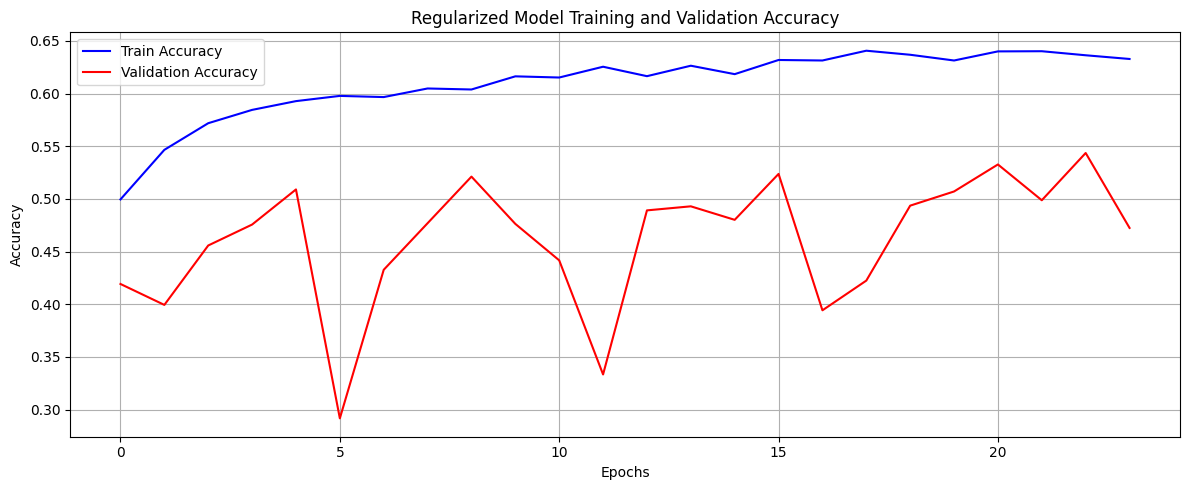

49/49 ━━━━━━━━━━━━━━━━━━━━ 274s 6s/step


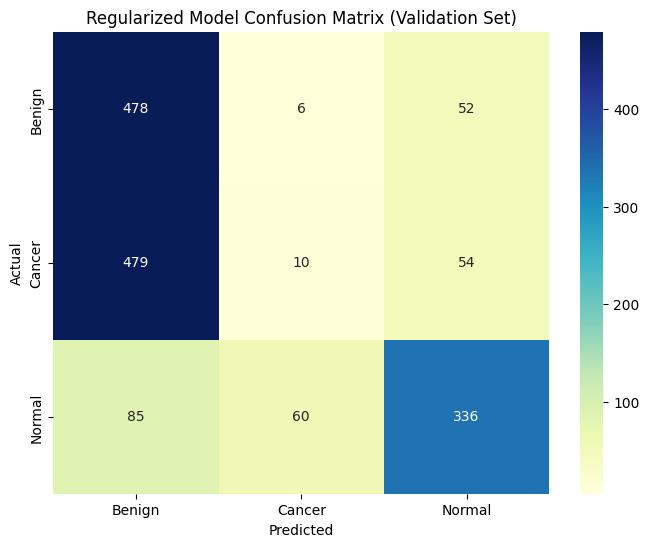

Regularized Model Scores
              precision    recall  f1-score   support

      Benign       0.46      0.89      0.61       536
      Cancer       0.13      0.02      0.03       543
      Normal       0.76      0.70      0.73       481

    accuracy                           0.53      1560
   macro avg       0.45      0.54      0.46      1560
weighted avg       0.44      0.53      0.44      1560

Regularized Model AUC-ROC (macro average): 0.6720


In [32]:
# Accuracy
plt.figure(figsize=(12, 5))
plt.plot(regularized_model_history.history['accuracy'], 'b-', label='Train Accuracy')
plt.plot(regularized_model_history.history['val_accuracy'], 'r-', label='Validation Accuracy')
plt.title('Regularized Model Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# This predicts labels for validation set
Y_pred_probs = regularized_model.predict(validation_set)
y_pred = np.argmax(Y_pred_probs, axis=1)
y_true = validation_set.classes
class_labels = list(validation_set.class_indices.keys())

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=class_labels, yticklabels=class_labels, cmap='YlGnBu')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Regularized Model Confusion Matrix (Validation Set)')
plt.show()

# This prints classification Report for Precision, Sensitivity (Recall), F1-score
print("Regularized Model Scores")
print(classification_report(y_true, y_pred, target_names=class_labels, zero_division=0))

# Area Under the ROC Curve (AUC-ROC)
y_true_bin = label_binarize(y_true, classes=[0, 1, 2])
auc_roc = roc_auc_score(y_true_bin, Y_pred_probs, average='macro', multi_class='ovr')
# changed to .4f for easier reading, too many nums
print(f"Regularized Model AUC-ROC (macro average): {auc_roc:.4f}")

The regularized model accuracy curves for training and validation show a smaller gap, with training accuracy levelling off around 63% and validation accuracy varying between 40% and 55% across epochs, suggesting better generalization than previous models. (See Figure 10.7.3)
The confusion matrix shows that the model successfully differentiates between the Benign and Normal classes, yet it still has difficulty detecting Cancer, where most Cancer cases seem to be incorrectly classified as Benign. The Benign class reached a notable recall of 0.89 and an F1-score of 0.61, whereas the Normal class secured the highest F1-score of 0.73, indicating the model’s effectiveness in detecting and differentiating normal images. Nonetheless, the Cancer category achieved a low F1-score of 0.03, emphasizing ongoing challenges in accurately classifying Cancer cases.

## Wider, Deeper, Narrower Models

Wider, deeper, and narrower model configurations are being tested to help examine the impact of capacity on learning on breast screening mammography images and acts as an extension of tuning hyperparameters. The wider model was developed to enable the network to recognize more complex patterns in the data. On the other hand, deeper model enables the network to grasp more intricate hierarchical representations. Finally, the narrower model, prioritizing simplicity and assist in mitigating the chances of overfitting by reducing the model's complexity.

### Wider Model

The wider model was created by doubling the filters per layer (64, 128, 256), allowing the model to explore capacity while maintaining the previous architecture.

In [33]:
wider_model = models.Sequential([
    # Models input size
    layers.Input(shape=(img_height, img_width, 1), name='input_layer'),

    # 64 filters with 3×3 kernel and ReLU activation and L2 weight decay to penalize overly large weights and reduce overfitting
    layers.Conv2D(64, (3, 3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(0.001)),
    layers.BatchNormalization(),
    layers.MaxPooling2D(2, 2),
    # This SpatialDropout2D is added, increasingly as well, to each pooling layer to encourage robustness in spatial feature learning
    layers.SpatialDropout2D(0.2),

    # Filter is being increased to 128
    layers.Conv2D(128, (3, 3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(0.001)),
    layers.BatchNormalization(),
    layers.MaxPooling2D(2, 2),
    layers.SpatialDropout2D(0.2),

    # Filter is being increased to 256
    layers.Conv2D(256, (3, 3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(0.001)),
    layers.BatchNormalization(),
    layers.MaxPooling2D(2, 2),
    layers.SpatialDropout2D(0.3),

    # This replaces Flatten, averaging the spatial dimensions and reducing the number of parameters
    layers.GlobalAveragePooling2D(),

    # Fully connected layer with 256 neurons
    layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    # Randomly drops 50% of the nodes to minimize overfitting
    layers.Dropout(0.5),

    # Final layer for the 3-classes using softmax activation
    layers.Dense(3, activation='softmax')
], name="wider_model")

wider_model.compile(
    optimizer='adam',
    # categorical_crossentrop for multi-class classification with one-hot encoded labels
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

wider_model.summary()

Model: "wider_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 224, 224, 64)   │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 224, 224, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ spatial_dropout2d_6             │ (None, 112, 112, 64)   │             0 │
│ (SpatialDropout2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 112, 112, 128)  │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ spatial_dropout2d_7             │ (None, 56, 56, 128)    │             0 │
│ (SpatialDropout2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 56, 56, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ spatial_dropout2d_8             │ (None, 28, 28, 256)    │             0 │
│ (SpatialDropout2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 256)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 3)              │           771 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 438,019 (1.67 MB)

 Trainable params: 437,123 (1.67 MB)

 Non-trainable params: 896 (3.50 KB)

In [35]:
# Early stopping to stop training if no changes after consecutive epochs
early_stopping = callbacks.EarlyStopping(patience=8, restore_best_weights=True)
# checkpoint acts as a save file to restore best model weights from training
checkpoint = callbacks.ModelCheckpoint('wider_model.keras', save_best_only=True)

wider_model_history = wider_model.fit(
    # Training data
    training_set,
    # Validation data
    validation_data=validation_set,
    # epochs remain at 50 from overfitting model
    epochs=50,
    # Class weights to address class imbalance
    class_weight=class_weights_dict,
    callbacks=[early_stopping, checkpoint],
    verbose=1
)

Epoch 1/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 978s 5s/step - accuracy: 0.4943 - loss: 1.4604 - val_accuracy: 0.4096 - val_loss: 1.5286
Epoch 2/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 1402s 7s/step - accuracy: 0.5434 - loss: 1.2203 - val_accuracy: 0.2115 - val_loss: 1.4981
Epoch 3/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 1433s 7s/step - accuracy: 0.5731 - loss: 1.0927 - val_accuracy: 0.2776 - val_loss: 1.5276
Epoch 4/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 1300s 7s/step - accuracy: 0.5825 - loss: 0.9925 - val_accuracy: 0.3462 - val_loss: 1.2610
Epoch 5/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 951s 5s/step - accuracy: 0.5945 - loss: 0.9441 - val_accuracy: 0.2071 - val_loss: 1.4356
Epoch 6/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 851s 4s/step - accuracy: 0.6079 - loss: 0.9150 - val_accuracy: 0.3449 - val_loss: 1.4705
Epoch 7/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 867s 4s/step - accuracy: 0.6349 - loss: 0.8555 - val_accuracy: 0.4667 - val_loss: 1.2281
Epoch 8/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 914s 5s/step - accuracy: 0.6127 - loss: 0.8481 - val_a

### Wider Model Evaluation

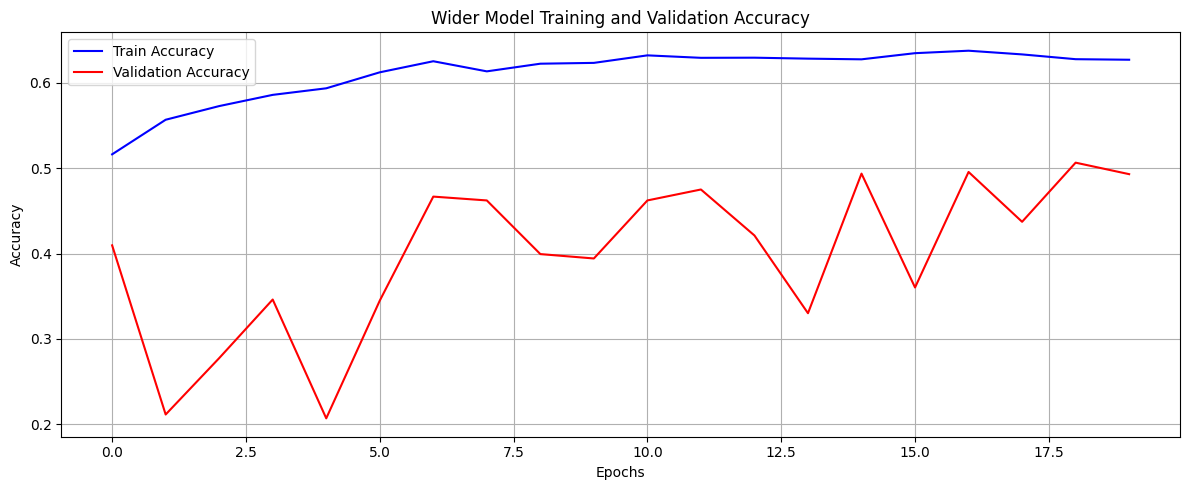

49/49 ━━━━━━━━━━━━━━━━━━━━ 151s 3s/step


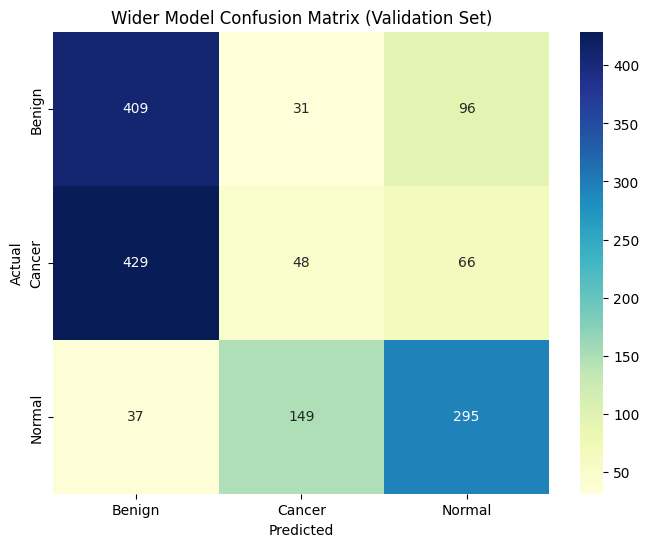

Wider Model Scores
              precision    recall  f1-score   support

      Benign       0.47      0.76      0.58       536
      Cancer       0.21      0.09      0.12       543
      Normal       0.65      0.61      0.63       481

    accuracy                           0.48      1560
   macro avg       0.44      0.49      0.44      1560
weighted avg       0.43      0.48      0.44      1560

Wider Model AUC-ROC (macro average): 0.6430


In [38]:
# Accuracy
plt.figure(figsize=(12, 5))
plt.plot(wider_model_history.history['accuracy'], 'b-', label='Train Accuracy')
plt.plot(wider_model_history.history['val_accuracy'], 'r-', label='Validation Accuracy')
plt.title('Wider Model Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# This predicts labels for validation set
Y_pred_probs = wider_model.predict(validation_set)
y_pred = np.argmax(Y_pred_probs, axis=1)
y_true = validation_set.classes
class_labels = list(validation_set.class_indices.keys())

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=class_labels, yticklabels=class_labels, cmap='YlGnBu')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Wider Model Confusion Matrix (Validation Set)')
plt.show()

# This prints classification Report for Precision, Sensitivity (Recall), F1-score
print("Wider Model Scores")
print(classification_report(y_true, y_pred, target_names=class_labels, zero_division=0))

# Area Under the ROC Curve (AUC-ROC)
y_true_bin = label_binarize(y_true, classes=[0, 1, 2])
auc_roc = roc_auc_score(y_true_bin, Y_pred_probs, average='macro', multi_class='ovr')
print(f"Wider Model AUC-ROC (macro average): {auc_roc:.4f}")

The Wider model attained an accuracy of 48% and a macro AUC-ROC of 0.64, indicating better classification of Benign and Normal cases but minimal improvement in Cancer detection (recall = 0.09). Its increased number of parameters enhanced feature variety, but continues to misclassify Cancer cases, possibly due to the image width and height declared.

### Deeper Model

The deeper model is modelled by adding an additional 32, 64, and 128 filtered layer on top of the regularized model.

In [25]:
deeper_model = models.Sequential([
    # Models input size
    layers.Input(shape=(img_height, img_width, 1), name='input_layer'),

    # 32 filters with 3×3 kernel and ReLU activation and L2 weight decay to penalize overly large weights and reduce overfitting
    layers.Conv2D(32, (3, 3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(0.001)),
    layers.BatchNormalization(),
    layers.MaxPooling2D(2, 2),
    # This SpatialDropout2D is added, increasingly as well, to each pooling layer to encourage robustness in spatial feature learning
    layers.SpatialDropout2D(0.2),

    # This is an additional filter layer for increased depth
    layers.Conv2D(32, (3, 3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(0.001)),
    layers.BatchNormalization(),
    layers.MaxPooling2D(2, 2),
    layers.SpatialDropout2D(0.2),

    # Filter is being increased to 64
    layers.Conv2D(64, (3, 3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(0.001)),
    layers.BatchNormalization(),
    layers.MaxPooling2D(2, 2),
    layers.SpatialDropout2D(0.2),

    # This is an additional filter layer for increased depth
    layers.Conv2D(64, (3, 3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(0.001)),
    layers.BatchNormalization(),
    layers.MaxPooling2D(2, 2),
    layers.SpatialDropout2D(0.3),

    # Filter is being increased to 128
    layers.Conv2D(128, (3, 3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(0.001)),
    layers.BatchNormalization(),
    layers.MaxPooling2D(2, 2),
    layers.SpatialDropout2D(0.3),

    # This is an additional filter layer for increased depth
    layers.Conv2D(128, (3, 3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(0.001)),
    layers.BatchNormalization(),
    layers.MaxPooling2D(2, 2),
    layers.SpatialDropout2D(0.3),

    # This replaces Flatten, averaging the spatial dimensions and reducing the number of parameters
    layers.GlobalAveragePooling2D(),

    # Fully connected layer with 128 neurons
    layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    # Randomly drops 50% of the nodes to minimize overfitting
    layers.Dropout(0.5),

    # Final layer for the 3-classes using softmax activation
    layers.Dense(3, activation='softmax')
], name="deeper_model")

deeper_model.compile(
    optimizer='adam',
    # categorical_crossentrop for multi-class classification with one-hot encoded labels
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

deeper_model.summary()

Model: "deeper_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 224, 224, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 224, 224, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ spatial_dropout2d               │ (None, 112, 112, 32)   │             0 │
│ (SpatialDropout2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 112, 112, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 112, 112, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 56, 56, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ spatial_dropout2d_1             │ (None, 56, 56, 32)     │             0 │
│ (SpatialDropout2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 56, 56, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 56, 56, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 28, 28, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ spatial_dropout2d_2             │ (None, 28, 28, 64)     │             0 │
│ (SpatialDropout2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 28, 28, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 28, 28, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ spatial_dropout2d_3             │ (None, 14, 14, 64)     │             0 │
│ (SpatialDropout2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 14, 14, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 14, 14, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ spatial_dropout2d_4             │ (None, 7, 7, 128)      │             0 │
│ (SpatialDropout2D)              │                        │             

 Total params: 305,123 (1.16 MB)

 Trainable params: 304,227 (1.16 MB)

 Non-trainable params: 896 (3.50 KB)

In [27]:
# Early stopping to stop training if no changes after consecutive epochs
early_stopping = callbacks.EarlyStopping(patience=8, restore_best_weights=True)
# checkpoint acts as a save file to restore best model weights from training
checkpoint = callbacks.ModelCheckpoint('deeper_model.keras', save_best_only=True)

deeper_model_history = deeper_model.fit(
    # Training data
    training_set,
    # Validation data
    validation_data=validation_set,
    # epochs remain at 50
    epochs=50,
    # Class weights to address class imbalance
    class_weight=class_weights_dict,
    callbacks=[early_stopping, checkpoint],
    verbose=1
)

C:\Users\Shado\anaconda3\envs\tf_env\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 1348s 7s/step - accuracy: 0.4631 - loss: 1.6793 - val_accuracy: 0.4622 - val_loss: 1.4525
Epoch 2/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 840s 4s/step - accuracy: 0.4957 - loss: 1.3883 - val_accuracy: 0.4917 - val_loss: 1.3790
Epoch 3/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 874s 4s/step - accuracy: 0.5213 - loss: 1.2767 - val_accuracy: 0.4929 - val_loss: 1.4505
Epoch 4/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 927s 5s/step - accuracy: 0.5458 - loss: 1.1867 - val_accuracy: 0.4577 - val_loss: 1.4635
Epoch 5/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 952s 5s/step - accuracy: 0.5630 - loss: 1.1127 - val_accuracy: 0.5295 - val_loss: 1.3981
Epoch 6/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 956s 5s/step - accuracy: 0.5804 - loss: 1.0553 - val_accuracy: 0.4494 - val_loss: 1.3339
Epoch 7/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 965s 5s/step - accuracy: 0.5819 - loss: 1.0165 - val_accuracy: 0.4904 - val_loss: 1.3036
Epoch 8/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 972s 5s/step - accuracy: 0.5783 - loss: 0.9581 - val_acc

### Deeper Model Evaluation

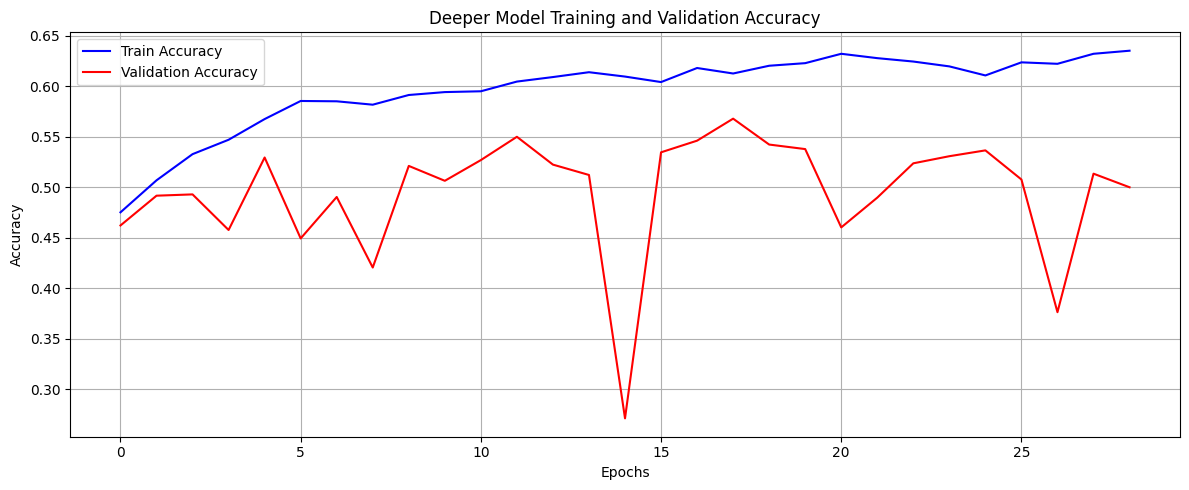

49/49 ━━━━━━━━━━━━━━━━━━━━ 156s 3s/step


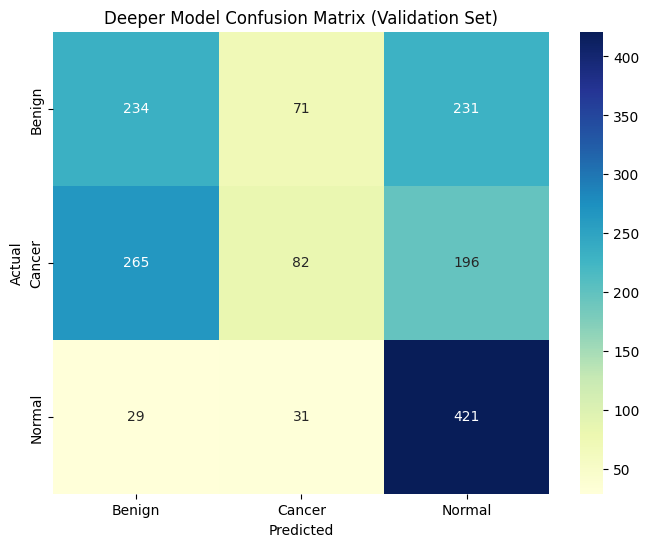

Deeper Model Scores
              precision    recall  f1-score   support

      Benign       0.44      0.44      0.44       536
      Cancer       0.45      0.15      0.23       543
      Normal       0.50      0.88      0.63       481

    accuracy                           0.47      1560
   macro avg       0.46      0.49      0.43      1560
weighted avg       0.46      0.47      0.42      1560

Deeper Model AUC-ROC (macro average): 0.7444


In [29]:
# Accuracy
plt.figure(figsize=(12, 5))
plt.plot(deeper_model_history.history['accuracy'], 'b-', label='Train Accuracy')
plt.plot(deeper_model_history.history['val_accuracy'], 'r-', label='Validation Accuracy')
plt.title('Deeper Model Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# This predicts labels for validation set
Y_pred_probs = deeper_model.predict(validation_set)
y_pred = np.argmax(Y_pred_probs, axis=1)
y_true = validation_set.classes
class_labels = list(validation_set.class_indices.keys())

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=class_labels, yticklabels=class_labels, cmap='YlGnBu')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Deeper Model Confusion Matrix (Validation Set)')
plt.show()

# This prints classification Report for Precision, Sensitivity (Recall), F1-score
print("Deeper Model Scores")
print(classification_report(y_true, y_pred, target_names=class_labels, zero_division=0))

# Area Under the ROC Curve (AUC-ROC)
y_true_bin = label_binarize(y_true, classes=[0, 1, 2])
auc_roc = roc_auc_score(y_true_bin, Y_pred_probs, average='macro', multi_class='ovr')
print(f"Deeper Model AUC-ROC (macro average): {auc_roc:.4f}")

The Deeper model showed a balance between generalization and the feature extraction depth, reaching an accuracy of 47% and a macro AUC-ROC of 0.74, which was the highest of the three. Normal class sensitivity enhanced (recall = 0.88).

### Narrower Model

As opposed to the wider model, the narrower model was created by reducing the filters per layer by half (16, 32, 64).

In [40]:
narrower_model = models.Sequential([
    # Models input size
    layers.Input(shape=(img_height, img_width, 1), name='input_layer'),

    # 16 filters with 3×3 kernel and ReLU activation and L2 weight decay to penalize overly large weights and reduce overfitting
    layers.Conv2D(16, (3, 3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(0.001)),
    layers.BatchNormalization(),
    layers.MaxPooling2D(2, 2),
    # This SpatialDropout2D is added, increasingly as well, to each pooling layer to encourage robustness in spatial feature learning
    layers.SpatialDropout2D(0.2),

    # Filter is being increased to 32
    layers.Conv2D(32, (3, 3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(0.001)),
    layers.BatchNormalization(),
    layers.MaxPooling2D(2, 2),
    layers.SpatialDropout2D(0.2),

    # Filter is being increased to 64
    layers.Conv2D(64, (3, 3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(0.001)),
    layers.BatchNormalization(),
    layers.MaxPooling2D(2, 2),
    layers.SpatialDropout2D(0.3),

    # This replaces Flatten, averaging the spatial dimensions and reducing the number of parameters
    layers.GlobalAveragePooling2D(),

    # Fully connected layer with 64 neurons
    layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    # Randomly drops 50% of the nodes to minimize overfitting
    layers.Dropout(0.5),

    # Final layer for the 3-classes using softmax activation
    layers.Dense(3, activation='softmax')
], name="narrower_model")

narrower_model.compile(
    optimizer='adam',
    # categorical_crossentrop for multi-class classification with one-hot encoded labels
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

narrower_model.summary()

Model: "narrower_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)               │ (None, 224, 224, 16)   │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 224, 224, 16)   │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 112, 112, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ spatial_dropout2d_9             │ (None, 112, 112, 16)   │             0 │
│ (SpatialDropout2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 112, 112, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 112, 112, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 56, 56, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ spatial_dropout2d_10            │ (None, 56, 56, 32)     │             0 │
│ (SpatialDropout2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 56, 56, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 56, 56, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 28, 28, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ spatial_dropout2d_11            │ (None, 28, 28, 64)     │             0 │
│ (SpatialDropout2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_2      │ (None, 64)             │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 28,099 (109.76 KB)

 Trainable params: 27,875 (108.89 KB)

 Non-trainable params: 224 (896.00 B)

In [42]:
# Early stopping to stop training if no changes after consecutive epochs
early_stopping = callbacks.EarlyStopping(patience=8, restore_best_weights=True)
# checkpoint acts as a save file to restore best model weights from training
checkpoint = callbacks.ModelCheckpoint('narrower_model.keras', save_best_only=True)

narrower_model_history = narrower_model.fit(
    # Training data
    training_set,
    # Validation data
    validation_data=validation_set,
    # epochs remain at 50
    epochs=50,
    # Class weights to address class imbalance
    class_weight=class_weights_dict,
    callbacks=[early_stopping, checkpoint],
    verbose=1
)

Epoch 1/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 882s 4s/step - accuracy: 0.4801 - loss: 1.1179 - val_accuracy: 0.3372 - val_loss: 1.2334
Epoch 2/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 870s 4s/step - accuracy: 0.5496 - loss: 0.9980 - val_accuracy: 0.3968 - val_loss: 1.2348
Epoch 3/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 863s 4s/step - accuracy: 0.5379 - loss: 0.9659 - val_accuracy: 0.4321 - val_loss: 1.1703
Epoch 4/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 863s 4s/step - accuracy: 0.5432 - loss: 0.9097 - val_accuracy: 0.5205 - val_loss: 1.1731
Epoch 5/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 869s 4s/step - accuracy: 0.5758 - loss: 0.8721 - val_accuracy: 0.5269 - val_loss: 1.1707
Epoch 6/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 863s 4s/step - accuracy: 0.5817 - loss: 0.8450 - val_accuracy: 0.4705 - val_loss: 1.4150
Epoch 7/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 866s 4s/step - accuracy: 0.5664 - loss: 0.8316 - val_accuracy: 0.5058 - val_loss: 1.2201
Epoch 8/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 870s 4s/step - accuracy: 0.5914 - loss: 0.8126 - val_accu

### Narrower Model Evaluation

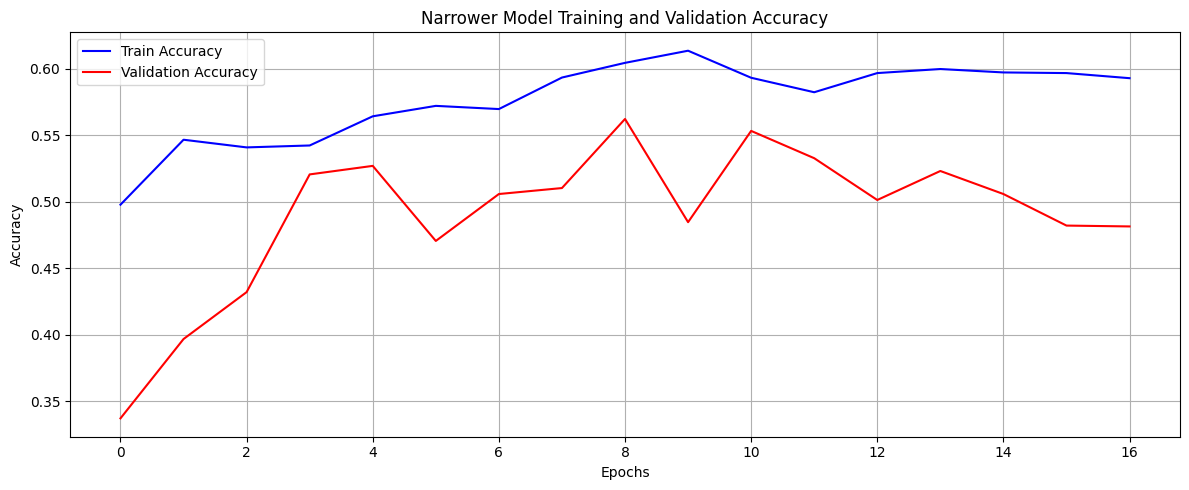

49/49 ━━━━━━━━━━━━━━━━━━━━ 193s 4s/step


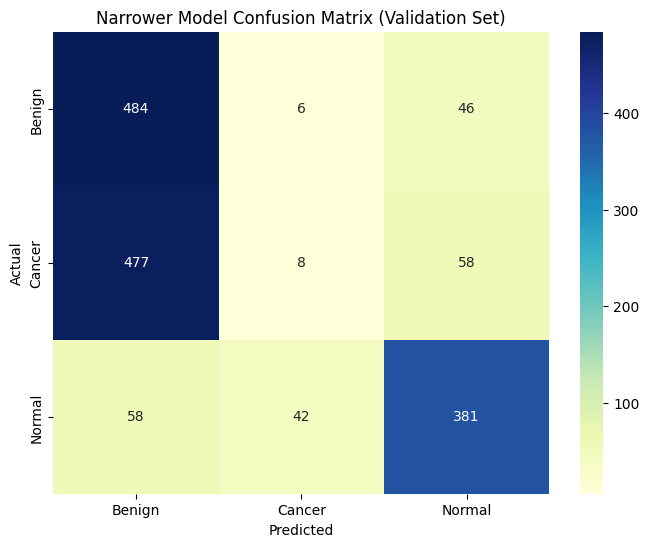

Narrower Model Scores
              precision    recall  f1-score   support

      Benign       0.47      0.90      0.62       536
      Cancer       0.14      0.01      0.03       543
      Normal       0.79      0.79      0.79       481

    accuracy                           0.56      1560
   macro avg       0.47      0.57      0.48      1560
weighted avg       0.46      0.56      0.47      1560

Narrower Model AUC-ROC (macro average): 0.7017


In [45]:
# Accuracy
plt.figure(figsize=(12, 5))
plt.plot(narrower_model_history.history['accuracy'], 'b-', label='Train Accuracy')
plt.plot(narrower_model_history.history['val_accuracy'], 'r-', label='Validation Accuracy')
plt.title('Narrower Model Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# This predicts labels for validation set
Y_pred_probs = narrower_model.predict(validation_set)
y_pred = np.argmax(Y_pred_probs, axis=1)
y_true = validation_set.classes
class_labels = list(validation_set.class_indices.keys())

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=class_labels, yticklabels=class_labels, cmap='YlGnBu')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Narrower Model Confusion Matrix (Validation Set)')
plt.show()

# This prints classification Report for Precision, Sensitivity (Recall), F1-score
print("Narrower Model Scores")
print(classification_report(y_true, y_pred, target_names=class_labels, zero_division=0))

# Area Under the ROC Curve (AUC-ROC)
y_true_bin = label_binarize(y_true, classes=[0, 1, 2])
auc_roc = roc_auc_score(y_true_bin, Y_pred_probs, average='macro', multi_class='ovr')
print(f"Narrower Model AUC-ROC (macro average): {auc_roc:.4f}")

The Narrower model reached the top accuracy of 56% alongside a macro AUC-ROC of 0.70. It demonstrated robust Normal (recall = 0.79) and Benign class performance (recall = 0.90), suggesting efficient class distinction despite a reduced model width.

The greater accuracy of the narrower model indicates that a more streamlined architecture may generalize more effectively on the dataset within the existing limitations; however, all models emphasize the necessity for specific enhancements, especially in cancer detection.

### Narrower Model Two

A second narrower model was re-implemented with increased image height and width dimensions (2560 x 1440) in hopes of achieving better results and compare outputs with resolution differences.

In [61]:
# 2k (QHD) resolution: 2560 x 1440
img_height, img_width = 2560, 1440

In [63]:
narrower_model_two = models.Sequential([
    # Models input size
    layers.Input(shape=(img_height, img_width, 1), name='input_layer'),

    # 16 filters with 3×3 kernel and ReLU activation and L2 weight decay to penalize overly large weights and reduce overfitting
    layers.Conv2D(16, (3, 3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(0.001)),
    layers.BatchNormalization(),
    layers.MaxPooling2D(2, 2),
    # This SpatialDropout2D is added, increasingly as well, to each pooling layer to encourage robustness in spatial feature learning
    layers.SpatialDropout2D(0.2),

    # Filter is being increased to 32
    layers.Conv2D(32, (3, 3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(0.001)),
    layers.BatchNormalization(),
    layers.MaxPooling2D(2, 2),
    layers.SpatialDropout2D(0.2),

    # Filter is being increased to 64
    layers.Conv2D(64, (3, 3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(0.001)),
    layers.BatchNormalization(),
    layers.MaxPooling2D(2, 2),
    layers.SpatialDropout2D(0.3),

    # This replaces Flatten, averaging the spatial dimensions and reducing the number of parameters
    layers.GlobalAveragePooling2D(),

    # Fully connected layer with 64 neurons
    layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    # Randomly drops 50% of the nodes to minimize overfitting
    layers.Dropout(0.5),

    # Final layer for the 3-classes using softmax activation
    layers.Dense(3, activation='softmax')  # 3 classes: Benign, Cancer, Normal
], name="narrower_model_two")

narrower_model_two.compile(
    optimizer='adam',
    # categorical_crossentrop for multi-class classification with one-hot encoded labels
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

narrower_model_two.summary()

Model: "narrower_model_two"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_15 (Conv2D)              │ (None, 2560, 1440, 16) │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_15          │ (None, 2560, 1440, 16) │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (None, 1280, 720, 16)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ spatial_dropout2d_15            │ (None, 1280, 720, 16)  │             0 │
│ (SpatialDropout2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 1280, 720, 32)  │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_16          │ (None, 1280, 720, 32)  │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_16 (MaxPooling2D) │ (None, 640, 360, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ spatial_dropout2d_16            │ (None, 640, 360, 32)   │             0 │
│ (SpatialDropout2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 640, 360, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_17          │ (None, 640, 360, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_17 (MaxPooling2D) │ (None, 320, 180, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ spatial_dropout2d_17            │ (None, 320, 180, 64)   │             0 │
│ (SpatialDropout2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_4      │ (None, 64)             │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 28,099 (109.76 KB)

 Trainable params: 27,875 (108.89 KB)

 Non-trainable params: 224 (896.00 B)

In [65]:
# Early stopping to stop training if no changes after consecutive epochs
early_stopping = callbacks.EarlyStopping(patience=8, restore_best_weights=True)
# checkpoint acts as a save file to restore best model weights from training
checkpoint = callbacks.ModelCheckpoint('narrower_model_two.keras', save_best_only=True)

narrower_model_two_history = narrower_model_two.fit(
    # Training data
    training_set,
    # Validation data
    validation_data=validation_set,
    # epochs remain at 50
    epochs=50,
    # Class weights to address class imbalance
    class_weight=class_weights_dict,
    callbacks=[early_stopping, checkpoint],
    verbose=1
)

Epoch 1/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 1065s 5s/step - accuracy: 0.4582 - loss: 1.1588 - val_accuracy: 0.3949 - val_loss: 1.1893
Epoch 2/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 1160s 6s/step - accuracy: 0.5295 - loss: 1.0066 - val_accuracy: 0.3897 - val_loss: 1.1770
Epoch 3/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 1154s 6s/step - accuracy: 0.5316 - loss: 0.9546 - val_accuracy: 0.4487 - val_loss: 1.2589
Epoch 4/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 1152s 6s/step - accuracy: 0.5600 - loss: 0.9090 - val_accuracy: 0.4494 - val_loss: 1.1787
Epoch 5/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 969s 5s/step - accuracy: 0.5658 - loss: 0.8822 - val_accuracy: 0.3622 - val_loss: 1.1573
Epoch 6/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 950s 5s/step - accuracy: 0.5708 - loss: 0.8630 - val_accuracy: 0.4929 - val_loss: 1.3018
Epoch 7/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 868s 4s/step - accuracy: 0.5756 - loss: 0.8440 - val_accuracy: 0.5372 - val_loss: 1.2207
Epoch 8/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 937s 5s/step - accuracy: 0.5887 - loss: 0.8368 - val_

### Narrower Model Two Evaluation

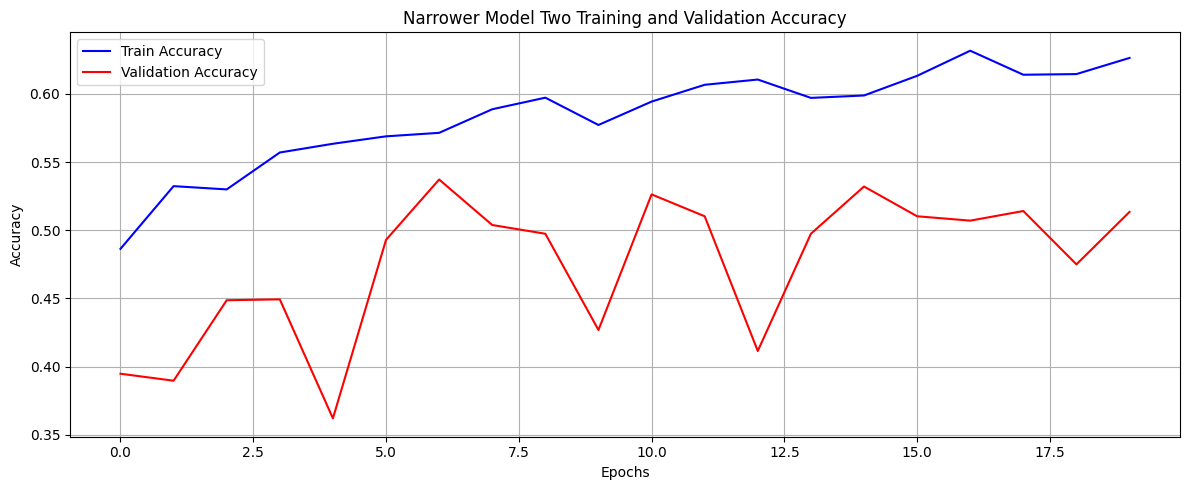

49/49 ━━━━━━━━━━━━━━━━━━━━ 187s 4s/step


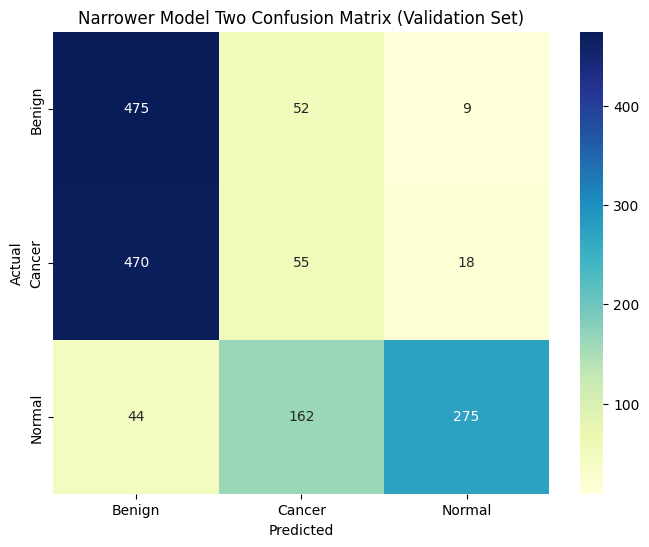

Narrower Model Two Scores
              precision    recall  f1-score   support

      Benign       0.48      0.89      0.62       536
      Cancer       0.20      0.10      0.14       543
      Normal       0.91      0.57      0.70       481

    accuracy                           0.52      1560
   macro avg       0.53      0.52      0.49      1560
weighted avg       0.52      0.52      0.48      1560

Narrower Model Two AUC-ROC (macro average): 0.5960


In [67]:
# Accuracy
plt.figure(figsize=(12, 5))
plt.plot(narrower_model_two_history.history['accuracy'], 'b-', label='Train Accuracy')
plt.plot(narrower_model_two_history.history['val_accuracy'], 'r-', label='Validation Accuracy')
plt.title('Narrower Model Two Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# This predicts labels for validation set
Y_pred_probs_two = narrower_model_two.predict(validation_set)
y_pred_two = np.argmax(Y_pred_probs_two, axis=1)
y_true_two = validation_set.classes
class_labels = list(validation_set.class_indices.keys())

# Confusion Matrix
cm_two = confusion_matrix(y_true_two, y_pred_two)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_two, annot=True, fmt='d', xticklabels=class_labels, yticklabels=class_labels, cmap='YlGnBu')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Narrower Model Two Confusion Matrix (Validation Set)')
plt.show()

# This prints classification Report for Precision, Sensitivity (Recall), F1-score
print("Narrower Model Two Scores")
print(classification_report(y_true_two, y_pred_two, target_names=class_labels, zero_division=0))

# Area Under the ROC Curve (AUC-ROC)
y_true_two_bin = label_binarize(y_true_two, classes=[0, 1, 2])
auc_roc_two = roc_auc_score(y_true_two_bin, Y_pred_probs_two, average='macro', multi_class='ovr')
print(f"Narrower Model Two AUC-ROC (macro average): {auc_roc_two:.4f}")

Despite the increased resolution (2560 x 1440), the second narrower model did not yield substantial improvements in detecting Cancer cases. Possible implications might be due to the high-resolution requiring additional and better architecture.

## Application of Transfer Learning

### Transfer Learning Model

Transfer learning model was created with EfficientNetB0, pretrained on ImageNet to improve classification performance. Due to EfficientNetB0's requirement for RGB input, grayscale mammograms were transformed into RGB, employing TensorFlow’s ImageDataGenerator with color_mode='rgb'. Techniques for data augmentation, such as random rotations, shifts, zooms, and flips, were utilized to enhance generalization.

At the start, the layers of the base model were locked to utilize the pretrained feature extraction while the new top layers were trained on the mammogram dataset. The EfficientNetB0 base model was imported without its upper layers, and a tailored classification head comprising a GlobalAveragePooling2D layer, a dense layer featuring 128 units with ReLU activation, a dropout layer for regularization, and a concluding dense layer with softmax activation for the three-class classification task was also incorporated.

In [84]:
# Gonna use EfficientNetB0, https://keras.io/api/applications/efficientnet/ 
transfer_train_datagen = ImageDataGenerator(
    # This rescales the pixel values to 0,1
    rescale=1./255,
    # This applies augmentation
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    vertical_flip=True,
    # This is 80 train 20 validation split 
    validation_split=0.2
)

# This is the training generator
# color_mode='rgb' is to convert grayscale to RGB for the EfficientNet
transfer_training_set = transfer_train_datagen.flow_from_directory(
    combined_img_dir, target_size=(224, 224), color_mode='rgb', batch_size=batch_size, class_mode='categorical', subset='training', shuffle=True
)

# This is the validation generator
# color_mode='rgb' is to convert grayscale to RGB for the EfficientNet
transfer_validation_set = transfer_train_datagen.flow_from_directory(
    combined_img_dir, target_size=(224, 224), color_mode='rgb', batch_size=batch_size, class_mode='categorical', subset='validation', shuffle=False
)

# This loads the EfficientNetB0 model with pretrain on 'imagenet' and remove default dense layers with include_top=False
base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# This is to use pre-trained feature extraction
base_model.trainable = False

# Models input size
inputs = Input(shape=(224, 224, 3))
x = base_model(inputs, training=False)
# This replaces Flatten, averaging the spatial dimensions and reducing the number of parameters
x = GlobalAveragePooling2D()(x)
# Fully connected layer with 128 neurons
x = Dense(128, activation='relu')(x)
# Randomly drops 50% of the nodes to minimize overfitting
x = Dropout(0.5)(x)
# Final layer for the 3-classes using softmax activation
outputs = Dense(3, activation='softmax')(x)

transfer_learning_model = Model(inputs, outputs, name="transfer_learning_model")

transfer_learning_model.compile(
    optimizer='adam',
    # categorical_crossentrop for multi-class classification with one-hot encoded labels
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

transfer_learning_model.summary

Found 6248 images belonging to 3 classes.
Found 1560 images belonging to 3 classes.


Model: "transfer_learning_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ efficientnetb0 (Functional)     │ (None, 7, 7, 1280)     │     4,049,571 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_5      │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 128)            │       163,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,213,926 (16.07 MB)

 Trainable params: 164,355 (642.01 KB)

 Non-trainable params: 4,049,571 (15.45 MB)

In [86]:
# Early stopping to stop training if no changes after consecutive epochs
early_stopping = callbacks.EarlyStopping(patience=8, restore_best_weights=True)
# checkpoint acts as a save file to restore best model weights from training
checkpoint = callbacks.ModelCheckpoint('transfer_learning_model.keras', save_best_only=True)

transfer_learning_model_history = transfer_learning_model.fit(
    # Training data
    transfer_training_set,
    # Validation data
    validation_data=transfer_validation_set,
    # epochs remain at 50
    epochs=50,
    # Class weights to address class imbalance
    class_weight=class_weights_dict,
    callbacks=[early_stopping, checkpoint],
    verbose=1
)

C:\Users\Shado\anaconda3\envs\tf_env\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 1504s 8s/step - accuracy: 0.3266 - loss: 1.1312 - val_accuracy: 0.3436 - val_loss: 1.0985
Epoch 2/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 1298s 7s/step - accuracy: 0.3326 - loss: 1.0996 - val_accuracy: 0.3481 - val_loss: 1.0984
Epoch 3/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 1250s 6s/step - accuracy: 0.3523 - loss: 1.0983 - val_accuracy: 0.3481 - val_loss: 1.0986
Epoch 4/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 1275s 7s/step - accuracy: 0.3459 - loss: 1.0997 - val_accuracy: 0.3481 - val_loss: 1.0985
Epoch 5/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 1265s 6s/step - accuracy: 0.3301 - loss: 1.0993 - val_accuracy: 0.3481 - val_loss: 1.0986
Epoch 6/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 1314s 7s/step - accuracy: 0.3441 - loss: 1.0979 - val_accuracy: 0.3481 - val_loss: 1.0986
Epoch 7/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 1339s 7s/step - accuracy: 0.3355 - loss: 1.0991 - val_accuracy: 0.3481 - val_loss: 1.0985
Epoch 8/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 1218s 6s/step - accuracy: 0.3209 - loss: 1.0990 - 

### Transfer Learning Model Evaluation

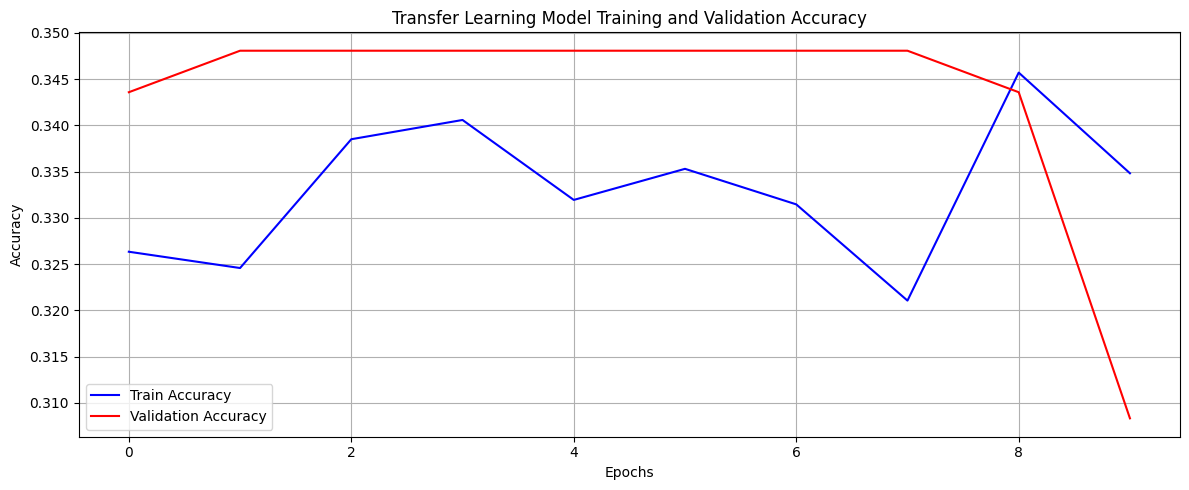

98/98 ━━━━━━━━━━━━━━━━━━━━ 290s 3s/step


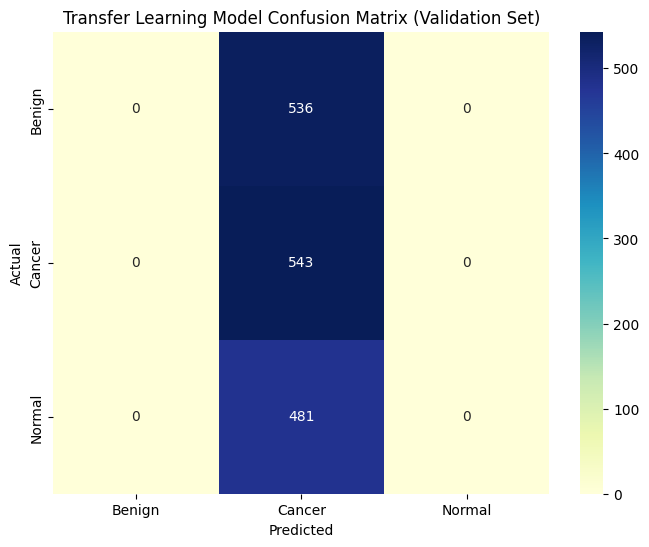

Transfer Learning Model Scores
              precision    recall  f1-score   support

      Benign       0.00      0.00      0.00       536
      Cancer       0.35      1.00      0.52       543
      Normal       0.00      0.00      0.00       481

    accuracy                           0.35      1560
   macro avg       0.12      0.33      0.17      1560
weighted avg       0.12      0.35      0.18      1560

Transfer Learning Model AUC-ROC (macro average): 0.5000


In [144]:
# Accuracy
plt.figure(figsize=(12, 5))
plt.plot(transfer_learning_model_history.history['accuracy'], 'b-', label='Train Accuracy')
plt.plot(transfer_learning_model_history.history['val_accuracy'], 'r-', label='Validation Accuracy')
plt.title('Transfer Learning Model Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# This predicts labels for validation set
Y_pred_probs_transfer = transfer_learning_model.predict(transfer_validation_set)
y_pred_transfer = np.argmax(Y_pred_probs_transfer, axis=1)
y_true_transfer = transfer_validation_set.classes
class_labels_transfer = list(transfer_validation_set.class_indices.keys())

# Confusion Matrix
cm_transfer = confusion_matrix(y_true_transfer, y_pred_transfer)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_transfer, annot=True, fmt='d', xticklabels=class_labels_transfer, yticklabels=class_labels_transfer, cmap='YlGnBu')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Transfer Learning Model Confusion Matrix (Validation Set)')
plt.show()

# This prints classification Report for Precision, Sensitivity (Recall), F1-score
print("Transfer Learning Model Scores")
print(classification_report(y_true_transfer, y_pred_transfer, target_names=class_labels_transfer, zero_division=0))

# Area Under the ROC Curve (AUC-ROC)
y_true_transfer_bin = label_binarize(y_true_transfer, classes=[0, 1, 2])
auc_roc_transfer = roc_auc_score(y_true_transfer_bin, Y_pred_probs_transfer, average='macro', multi_class='ovr')
print(f"Transfer Learning Model AUC-ROC (macro average): {auc_roc_transfer:.4f}")

The transfer learning model successfully extracted features to recognize the Cancer class, obtaining perfect recall for this class throughout the validation set. Nonetheless, the model output failures for between Benign and Normal cases, leading to no recall or precision for these categories. The Cancer class, which, although achieved high recall, led to low overall accuracy and a macro AUC-ROC of 0.50, reflecting random performance. Validation accuracy levelled off throughout the epochs, indicating little learning advancement and affirming that the model underperformed in the mammography classification task.

Possible reasons for this result is that utilizing frozen base layers in EfficientNet hindered the model's ability to adapt and learn features particular to mammography images, resulting in overly simplified outputs. Moreover, although pretraining on ImageNet provides advantages in feature extraction, the characteristics of the images might not effectively translate from the grayscale specific attributes found in medical imaging tasks without further fine-tuning.


## Exploring Models and Architectures

### Narrower and Transfer Learning Multi-Branch Model

A multi-branch architecture was developed with mask images pinpointing ROIs using narrower model for training Benign and Normal, and transfer learning EfficientNetB0 model for training the Cancer class. 

In [61]:
# This is the input layer with 4 channels that includse the images for the 3 classes and 1 for the mask
inputs_4ch = Input(shape=(224, 224, 4), name='input_layer')
# This is to extract only the channels for EfficientNet
inputs_3ch = Lambda(lambda x: x[:, :, :, :3], name='slice_rgb')(inputs_4ch)

In [63]:
# This is the data generator to load grayscale image and masks and combine them into a 4 channel input
class CombinedImageMaskGenerator(Sequence):
    def __init__(self, df, batch_size, num_classes, shuffle=True):
        self.df = df.reset_index(drop=True)
        self.batch_size = batch_size
        self.num_classes = num_classes
        self.shuffle = shuffle
        self.on_epoch_end()
    
    def __len__(self):
        return int(np.ceil(len(self.df) / self.batch_size))
    
    def on_epoch_end(self):
        self.indices = np.arange(len(self.df))
        if self.shuffle:
            np.random.shuffle(self.indices)
    
    def __getitem__(self, idx):
        batch_indices = self.indices[idx * self.batch_size:(idx + 1) * self.batch_size]
        batch_x = []
        batch_y = []
        
        for i in batch_indices:
            row = self.df.iloc[i]
            image_path = row['image_path']
            mask_path = row['mask_path']
            label = row['label']
            
            # This loads grayscale images and normalize to 0, 1
            image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
            image = cv2.resize(image, (224, 224)) / 255.0

            if pd.notna(mask_path) and os.path.exists(mask_path):
                mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)
                mask = cv2.resize(mask, (224, 224)) / 255.0
            else:
                mask = np.zeros_like(image)

            # This will stack the 3 class channels of images and the 1 channel of mask
            combined_input = np.stack([image, image, image, mask], axis=-1)  # (224,224,4)
            batch_x.append(combined_input)

            # This maps label strings to a class index then one-hot encode
            if label == 'Benign':
                y = 0
            elif label == 'Cancer':
                y = 1
            elif label == 'Normal':
                y = 2
            else:
                raise ValueError(f"Unknown label {label}")

            y_onehot = tf.keras.utils.to_categorical(y, num_classes=self.num_classes)
            batch_y.append(y_onehot)
        
        return np.array(batch_x, dtype=np.float32), np.array(batch_y, dtype=np.float32)

In [65]:
# This reloads the CSV created earlier in Loading and Preparing Dataset
df = pd.read_csv("Combined_MiniDDSM_Metadata.csv")
df_train, df_val = train_test_split(df, test_size=0.2, stratify=df['label'], random_state=42)

# This instantiates the data generator for training and validation
batch_size = 16
train_gen = CombinedImageMaskGenerator(df_train, batch_size=batch_size, num_classes=3)
val_gen = CombinedImageMaskGenerator(df_val, batch_size=batch_size, num_classes=3, shuffle=False)

In [67]:
# This is branch 1
# referenced from earlier Narrower Model for Benign/Normal
# 16 filters with 3×3 kernel and ReLU activation
b1 = Conv2D(16, (3, 3), activation='relu', padding='same')(inputs_4ch)
b1 = BatchNormalization()(b1)
b1 = MaxPooling2D(2, 2)(b1)
# This SpatialDropout2D is added, increasingly as well, to each pooling layer to encourage robustness in spatial feature learning
b1 = SpatialDropout2D(0.2)(b1)

# Filter is being increased to 32
b1 = Conv2D(32, (3, 3), activation='relu', padding='same')(b1)
b1 = BatchNormalization()(b1)
b1 = MaxPooling2D(2, 2)(b1)
b1 = SpatialDropout2D(0.2)(b1)

# Filter is being increased to 64
b1 = Conv2D(64, (3, 3), activation='relu', padding='same')(b1)
b1 = BatchNormalization()(b1)
b1 = MaxPooling2D(2, 2)(b1)
b1 = SpatialDropout2D(0.3)(b1)

# This replaces Flatten, averaging the spatial dimensions and reducing the number of parameters
b1 = GlobalAveragePooling2D()(b1)

# This is branch 2
# referenced from earlier transfer Learning with EfficientNetB0 for Cancer
# Load pre-trained EfficientNetB0 for transfer learning on RGB channels
base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# This freezes the layers during phase 1 training so that the layers weights wont update during back propagation
base_model.trainable = False

# This applies model to 3 channel input
b2 = base_model(inputs_3ch, training=False)

# This replaces Flatten, averaging the spatial dimensions and reducing the number of parameters
b2 = GlobalAveragePooling2D()(b2)

# This combines the outputs from both branches
combined = Concatenate()([b1, b2])

# Fully connected layer with 128 neurons
combined = Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.001))(combined)
# Randomly drops 50% of the nodes to minimize overfitting
combined = Dropout(0.5)(combined)

# Final layer for the 3-classes using softmax activation
outputs = Dense(3, activation='softmax')(combined)

narrower_and_transfer_learning_model = Model(inputs_4ch, outputs, name="narrower_and_transfer_learning_model")

# Compile
narrower_and_transfer_learning_model.compile(
    optimizer=Adam(learning_rate=1e-4),
    # categorical_crossentrop for multi-class classification with one-hot encoded labels
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

narrower_and_transfer_learning_model.summary()

Model: "narrower_and_transfer_learning_model"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 4)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_31 (Conv2D)  │ (None, 224, 224,  │        592 │ input_layer[0][0] │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 224, 224,  │         64 │ conv2d_31[0][0]   │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_30    │ (None, 112, 112,  │          0 │ batch_normalizat… │
│ (MaxPooling2D)      │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ spatial_dropout2d_… │ (None, 112, 112,  │          0 │ max_pooling2d_30… │
│ (SpatialDropout2D)  │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_32 (Conv2D)  │ (None, 112, 112,  │      4,640 │ spatial_dropout2… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 112, 112,  │        128 │ conv2d_32[0][0]   │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_31    │ (None, 56, 56,    │          0 │ batch_normalizat… │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ spatial_dropout2d_… │ (None, 56, 56,    │          0 │ max_pooling2d_31… │
│ (SpatialDropout2D)  │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_33 (Conv2D)  │ (None, 56, 56,    │     18,496 │ spatial_dropout2… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 56, 56,    │        256 │ conv2d_33[0][0]   │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_32    │ (None, 28, 28,    │          0 │ batch_normalizat… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ slice_rgb (Lambda)  │ (None, 224, 224,  │          0 │ input_layer[0][0] │
│                     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ spatial_dropout2d_… │ (None, 28, 28,    │          0 │ max_pooling2d_32… │
│ (SpatialDropout2D)  │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ efficientnetb0      │ (None, 7, 7,      │  4,049,571 │ slice_rgb[0][0]   │
│ (Functional)        │ 1280)             │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_average_poo… │ (None, 64)        │          0 │ spatial_dropout2… │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_average_poo… │ (None, 1280)      │          0 │ efficientnetb0[0

 Total params: 4,246,294 (16.20 MB)

 Trainable params: 196,499 (767.57 KB)

 Non-trainable params: 4,049,795 (15.45 MB)

In [33]:
# Early stopping to stop training if no changes after consecutive epochs
early_stopping = callbacks.EarlyStopping(patience=8, restore_best_weights=True)
# checkpoint acts as a save file to restore best model weights from training
checkpoint = callbacks.ModelCheckpoint('narrower_and_transfer_learning_model.keras', save_best_only=True)
# Added reduce_lr to reduce learning rate if the validation loss doesnt improve after consecutive epochs
reduce_lr = callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=4, verbose=1)

# This is the phase 1 training with EfficientNetB0 frozen
history_phase1 = narrower_and_transfer_learning_model.fit(
    # Training data
    train_gen,
    # Validation data
    validation_data=val_gen,
    # epochs
    epochs=20,
    # Class weights to address class imbalance
    class_weight=class_weights_dict,
    callbacks=[early_stopping, checkpoint, reduce_lr],
    verbose=1
)

# This will unfreeze top 30% of EfficientNetB0 layers for fine-tuning
fine_tune_at = int(len(base_model.layers) * 0.7)
for layer in base_model.layers[fine_tune_at:]:
    layer.trainable = True

# This recompiles with a lower learning rate to help mitigate over updating pre-trained weights
narrower_and_transfer_learning_model.compile(
    optimizer=Adam(learning_rate=1e-5),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# This continues the training from where phase 1 stopped
history_phase2 = narrower_and_transfer_learning_model.fit(
    # Training data
    train_gen,
    # Validation data
    validation_data=val_gen,
    # epochs
    initial_epoch=history_phase1.epoch[-1] + 1,
    epochs=50,
    # Class weights to address class imbalance
    class_weight=class_weights_dict,
    callbacks=[early_stopping, checkpoint, reduce_lr],
    verbose=1
)

C:\Users\Shado\anaconda3\envs\tf_env\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 988s 2s/step - accuracy: 0.4159 - loss: 1.2799 - val_accuracy: 0.3848 - val_loss: 1.2473 - learning_rate: 1.0000e-04
Epoch 2/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 853s 2s/step - accuracy: 0.4975 - loss: 1.1571 - val_accuracy: 0.5064 - val_loss: 1.1067 - learning_rate: 1.0000e-04
Epoch 3/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 865s 2s/step - accuracy: 0.5002 - loss: 1.1247 - val_accuracy: 0.5365 - val_loss: 1.0669 - learning_rate: 1.0000e-04
Epoch 4/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 851s 2s/step - accuracy: 0.4926 - loss: 1.0903 - val_accuracy: 0.5621 - val_loss: 1.0265 - learning_rate: 1.0000e-04
Epoch 5/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 871s 2s/step - accuracy: 0.5093 - loss: 1.0434 - val_accuracy: 0.5077 - val_loss: 1.0309 - learning_rate: 1.0000e-04
Epoch 6/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 873s 2s/step - accuracy: 0.5228 - loss: 1.0074 - val_accuracy: 0.5960 - val_loss: 0.9866 - learning_rate: 1.0000e-04
Epoch 7/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 849s 2s/step - acc

### Narrower and Transfer Learning Multi-Branch Model Evaluation

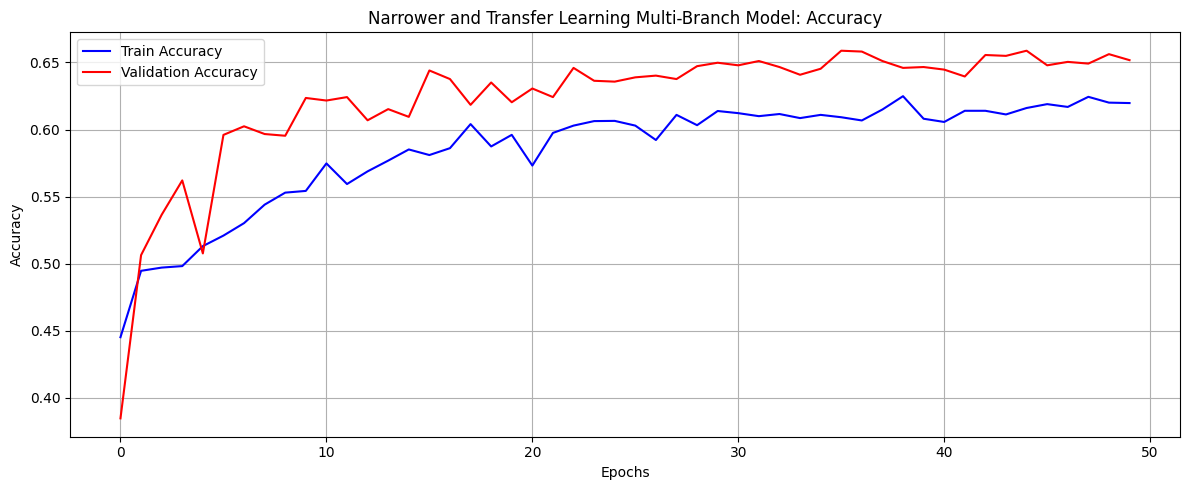

98/98 ━━━━━━━━━━━━━━━━━━━━ 188s 2s/step


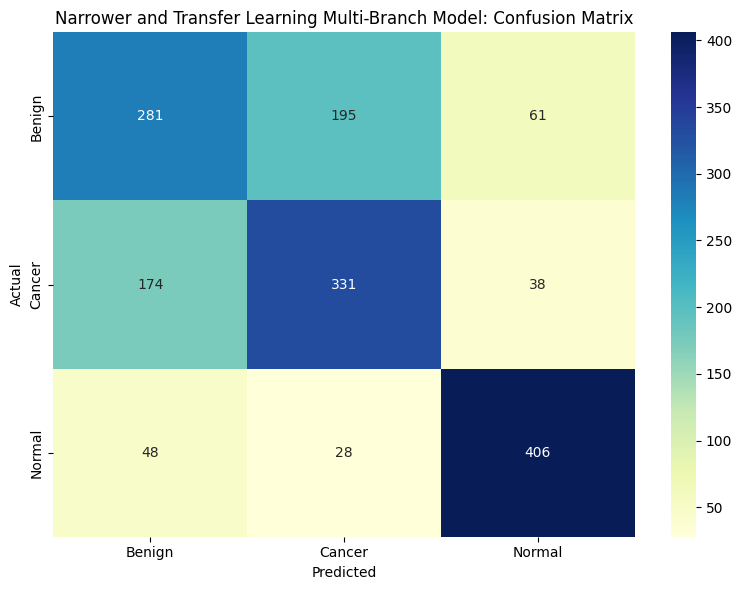

Narrower and Transfer Learning Multi-Branch Model Scores:
              precision    recall  f1-score   support

      Benign       0.56      0.52      0.54       537
      Cancer       0.60      0.61      0.60       543
      Normal       0.80      0.84      0.82       482

    accuracy                           0.65      1562
   macro avg       0.65      0.66      0.66      1562
weighted avg       0.65      0.65      0.65      1562

Narrower and Transfer Learning Multi-Branch Model AUC-ROC (macro average): 0.8563


In [49]:
history_combined = {}
for key in ['accuracy', 'val_accuracy', 'loss', 'val_loss']:
    history_combined[key] = history_phase1.history[key] + history_phase2.history[key]

# Accuracy
plt.figure(figsize=(12, 5))
plt.plot(history_combined['accuracy'], 'b-', label='Train Accuracy')
plt.plot(history_combined['val_accuracy'], 'r-', label='Validation Accuracy')
plt.title('Narrower and Transfer Learning Multi-Branch Model: Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# This predicts labels for validation set
label_mapping = {'Benign': 0, 'Cancer': 1, 'Normal': 2}
y_true_natl = df_val['label'].map(label_mapping).values
Y_pred_probs_natl = narrower_and_transfer_learning_model.predict(val_gen, verbose=1)
y_pred_natl = np.argmax(Y_pred_probs_natl, axis=1)
class_labels_natl = ['Benign', 'Cancer', 'Normal']

# Confusion Matrix
cm_natl = confusion_matrix(y_true_natl, y_pred_natl)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_natl, annot=True, fmt='d', xticklabels=class_labels_natl, yticklabels=class_labels_natl, cmap='YlGnBu')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Narrower and Transfer Learning Multi-Branch Model: Confusion Matrix')
plt.tight_layout()
plt.show()

# This prints classification Report for Precision, Sensitivity (Recall), F1-score
print("Narrower and Transfer Learning Multi-Branch Model Scores:")
print(classification_report(y_true_natl, y_pred_natl, target_names=class_labels_natl, zero_division=0))

# Area Under the ROC Curve (AUC-ROC)
y_true_natl_bin = label_binarize(y_true_natl, classes=[0, 1, 2])
auc_roc_natl = roc_auc_score(y_true_natl_bin, Y_pred_probs_natl, average='macro', multi_class='ovr')
print(f"Narrower and Transfer Learning Multi-Branch Model AUC-ROC (macro average): {auc_roc_natl:.4f}")

The multi-branch model showcased a balanced performance across classes, with the Cancer class achieving a recall of 61% and an F1-score of 60%, indicating a significant enhancement compared to earlier models that had difficulties with this class. The Normal class reached a recall of 84% and an F1-score of 82%, whereas the Benign class showed moderate performance, achieving an F1-score of 54%.

This architecture improved the model’s sensitivity towards Cancer cases and boosted its overall robustness and class balance, tackling previous limitations found in single-branch and transfer learning methods.


### Modified U-Net Model

Modified U-Net was also implemented for its performance on medical image segmentation with limited data and can provide a strong foundation for further advanced architectures.

The Modified U-Net architecture was developed based on Hossain, M.S. (2022) [16] where Laplacian filter is introduced to enhance the images and images are trained in patches. Quantitative evaluation also follows the work where recall (sensitivity), precision, accuracy, F-measurement, Jaccard index and Dice score are being analysed.

Although somewhat similar, the code and architecture may differ slightly in areas that may not have been explicitly stated by Hossain, M.S. (2022) [62]:

- BatchNormalization and Dropout which are typical for Modified U-Nets are being utilized.

- Final layer Conv2D(1, (1,1), activation='sigmoid') matches Conv.(1x1) + ReLU

- (2×2) Transposed Conv is used for up sampling instead of fixed Up Conv blocks

While the implementation may be a slightly modified version, these adjustments are reasonable alterations identified in contemporary literature aimed at enhancing convergence and generalization while maintaining consistent architecture structure.


In [29]:
# This is the image patch size
PATCH_SIZE = 256
# Stride controls the overlap between patches, since 128 is half of 256, the patches overlaps 50% between each other
STRIDE = 128
# This is the diemnsion the images and masks resize to before patching
RESIZE_DIM = 512
# This is the minimum foreground ratio. Note that the ratio is set extremely low to keep more patches
min_fg_ratio = 0.0005

# This is to store extracted image and mask patches
img_patches, mask_patches = [], []
# Yes i know, i did this before, but its a new day, new model, besides, better to reinitialize than to spend time finding a 'could be a prob'
df = pd.read_csv("Combined_MiniDDSM_Metadata.csv")

# This hops through each row in the csv
for idx in range(len(df)):
    img_path = df.loc[idx, 'image_path']
    mask_path = df.loc[idx, 'mask_path']

    if pd.notna(mask_path) and os.path.exists(mask_path):
        # This Loads the grayscale images and masks
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)

        # This is image resizing and normalization
        img = cv2.resize(img, (RESIZE_DIM, RESIZE_DIM)).astype(np.float32) / 255.0
        mask = cv2.resize(mask, (RESIZE_DIM, RESIZE_DIM)).astype(np.float32) / 255.0

        # This is/are temporary lists for patches of the current image
        img_p, mask_p = [], []

        # Similar to patch extraction, slide a window of patch_size across an image with the declared stride
        h, w = img.shape
        for y in range(0, h - PATCH_SIZE + 1, STRIDE):
            for x in range(0, w - PATCH_SIZE + 1, STRIDE):
                img_patch = img[y:y+PATCH_SIZE, x:x+PATCH_SIZE]
                mask_patch = mask[y:y+PATCH_SIZE, x:x+PATCH_SIZE]

                # This calculates the foreground ratio and keeps the patch if it has sufficient lesion area
                fg_ratio = np.mean(mask_patch > 0.1)
                print(f"Patch ({y},{x}) fg_ratio: {fg_ratio:.6f}")
                if fg_ratio > min_fg_ratio:
                    img_p.append(img_patch)
                    mask_p.append(mask_patch)

        # This appends valid patches from the image to the main list
        img_patches.extend(img_p)
        mask_patches.extend(mask_p)
        print(f"Image {idx} produced {len(img_p)} patches.")

print(f"Extracted {len(img_patches)} patches with sufficient lesions.")

Patch (0,0) fg_ratio: 0.000000
Patch (0,128) fg_ratio: 0.000000
Patch (0,256) fg_ratio: 0.000000
Patch (128,0) fg_ratio: 0.000000
Patch (128,128) fg_ratio: 0.000000
Patch (128,256) fg_ratio: 0.000992
Patch (256,0) fg_ratio: 0.000000
Patch (256,128) fg_ratio: 0.000000
Patch (256,256) fg_ratio: 0.000992
Image 0 produced 2 patches.
Patch (0,0) fg_ratio: 0.000000
Patch (0,128) fg_ratio: 0.000000
Patch (0,256) fg_ratio: 0.000183
Patch (128,0) fg_ratio: 0.000000
Patch (128,128) fg_ratio: 0.000290
Patch (128,256) fg_ratio: 0.000793
Patch (256,0) fg_ratio: 0.000000
Patch (256,128) fg_ratio: 0.000290
Patch (256,256) fg_ratio: 0.000610
Image 1 produced 2 patches.
Patch (0,0) fg_ratio: 0.000000
Patch (0,128) fg_ratio: 0.000000
Patch (0,256) fg_ratio: 0.000000
Patch (128,0) fg_ratio: 0.000000
Patch (128,128) fg_ratio: 0.000351
Patch (128,256) fg_ratio: 0.000351
Patch (256,0) fg_ratio: 0.000000
Patch (256,128) fg_ratio: 0.000351
Patch (256,256) fg_ratio: 0.000351
Image 4 produced 0 patches.
Patch (

In [27]:
# This cell is for the Laplacian filter
def apply_laplacian(image):
    # This is to apply histogram equalization to enhance contrast where images must be uint8
    image = cv2.equalizeHist((image * 255).astype(np.uint8))

    # This applies the Laplacian filter to detect edges
    laplacian = cv2.Laplacian(image, cv2.CV_64F)

    # The result is converted to 8-bit absolute scale then normalized to 0,1 for model input
    laplacian = cv2.convertScaleAbs(laplacian)
    laplacian = laplacian.astype(np.float32) / 255.0
    return laplacian

In [31]:
# This applies Laplacian edge enhancement to the image patches and convert to type float32
laplacian_patches = np.array([apply_laplacian(p) for p in img_patches], dtype=np.float32)[..., np.newaxis]

# This expands the dimensions of mask patches to shape H, W, 1 for model compatibility
mask_patches = np.array(mask_patches)[..., np.newaxis]

# This splits the data into 80% training and 20% validation
X_train, X_val, y_train, y_val = train_test_split( laplacian_patches, mask_patches, test_size=0.2, random_state=42)

print(f"Train patches: {X_train.shape}, Val patches: {X_val.shape}")

Train patches: (7414, 256, 256, 1), Val patches: (1854, 256, 256, 1)


In [33]:
# This is for metrics, Dice Loss metric
def dice_coef(y_true, y_pred, smooth=1e-6):
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    return (2. * intersection + smooth) / (K.sum(y_true_f) + K.sum(y_pred_f) + smooth)

def dice_loss(y_true, y_pred):
    return 1 - dice_coef(y_true, y_pred)

In [35]:
# This is to help define two convolutional layers with batch normalization and dropout
def conv_block(x, filters, dropout=0.2):
    x = layers.Conv2D(filters, (3,3), activation='relu', padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Conv2D(filters, (3,3), activation='relu', padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(dropout)(x)
    return x

def Modified_UNet(input_shape=(PATCH_SIZE, PATCH_SIZE, 1)):
    inputs = layers.Input(shape=input_shape)

    # This is encoder or contracting path with increasing filters 16, 32, 64, 128, bottleneck 256
    conv_block_1 = conv_block(inputs, 16)
    pool_1 = layers.MaxPooling2D((2, 2))(conv_block_1)
    conv_block_2 = conv_block(pool_1, 32)                 
    pool_2 = layers.MaxPooling2D((2, 2))(conv_block_2)
    conv_block_3 = conv_block(pool_2, 64)
    pool_3 = layers.MaxPooling2D((2, 2))(conv_block_3)
    conv_block_4 = conv_block(pool_3, 128)
    pool_4 = layers.MaxPooling2D((2, 2))(conv_block_4)
    conv_block_5 = conv_block(pool_4, 256)

    # This is decoder or expanding path with decreasing filters 128, 64, 32, 16
    upconv_6 = layers.Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(conv_block_5)
    concat_6 = layers.Concatenate()([upconv_6, conv_block_4])
    conv_block_6 = conv_block(concat_6, 128)
    upconv_7 = layers.Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(conv_block_6)
    concat_7 = layers.Concatenate()([upconv_7, conv_block_3])
    conv_block_7 = conv_block(concat_7, 64)
    upconv_8 = layers.Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same')(conv_block_7)
    concat_8 = layers.Concatenate()([upconv_8, conv_block_2])
    conv_block_8 = conv_block(concat_8, 32)
    upconv_9 = layers.Conv2DTranspose(16, (2, 2), strides=(2, 2), padding='same')(conv_block_8)
    concat_9 = layers.Concatenate()([upconv_9, conv_block_1])
    conv_block_9 = conv_block(concat_9, 16)

    # This is the output layer with sigmoid activation for binary segmentation
    outputs = layers.Conv2D(1, (1, 1), activation='sigmoid')(conv_block_9)

    return models.Model(inputs, outputs, name="modified_u_net_model")

model = Modified_UNet()
model.compile(
    optimizer=optimizers.Adam(learning_rate=1e-4),
    # This is Dice loss for segmentation
    loss=dice_loss,
    metrics=['accuracy', dice_coef]
)

model.summary()

Model: "modified_u_net_model"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 256, 256,  │          0 │ -                 │
│ (InputLayer)        │ 1)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 256, 256,  │        160 │ input_layer[0][0] │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 256, 256,  │         64 │ conv2d[0][0]      │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 256, 256,  │      2,320 │ batch_normalizat… │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 256, 256,  │         64 │ conv2d_1[0][0]    │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 256, 256,  │          0 │ batch_normalizat… │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 128, 128,  │          0 │ dropout[0][0]     │
│ (MaxPooling2D)      │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 128, 128,  │      4,640 │ max_pooling2d[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 128, 128,  │        128 │ conv2d_2[0][0]    │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 128, 128,  │      9,248 │ batch_normalizat… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 128, 128,  │        128 │ conv2d_3[0][0]    │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_1 (Dropout) │ (None, 128, 128,  │          0 │ batch_normalizat… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_1     │ (None, 64, 64,    │          0 │ dropout_1[0][0]   │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, 64, 64,    │     18,496 │ max_pooling2d_1[… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 64, 64,    │        256 │ conv2d_4[0][0]    │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_5 (Conv2D)   │ (None, 64, 64,    │     36,928 │ batch_normalizat… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 64, 64,    │        256 │ conv2d_5[0][0]  

 Total params: 1,946,705 (7.43 MB)

 Trainable params: 1,943,761 (7.41 MB)

 Non-trainable params: 2,944 (11.50 KB)

In [37]:
# This is the data generator for patch-based image and mask training
class PatchDataGenerator(Sequence):
    # This initializes the generator with image and mask patches
    def __init__(self, img_patches, mask_patches, batch_size=8, shuffle=True):
        self.img_patches = img_patches
        self.mask_patches = mask_patches
        self.batch_size = batch_size
        self.shuffle = shuffle
        self.indices = np.arange(len(self.img_patches))
        self.on_epoch_end()
        
    def __len__(self):
        # This returns the number of batches per epoch
        return int(np.ceil(len(self.img_patches) / self.batch_size))
    
    def __getitem__(self, idx):
        # This gets the indices for the current batch and extracts them
        indices = self.indices[idx * self.batch_size : (idx + 1) * self.batch_size]
        batch_x = [self.img_patches[i] for i in indices]
        batch_y = [self.mask_patches[i] for i in indices]

        # This converts them to arrays and add channel dimension
        batch_x = np.array(batch_x, dtype=np.float32)[..., np.newaxis]
        batch_y = np.array(batch_y, dtype=np.float32)[..., np.newaxis]
        return batch_x, batch_y

    # This shuffles the dataset indices after each epoch
    def on_epoch_end(self):
        if self.shuffle:
            np.random.shuffle(self.indices)

In [39]:
# Early stopping to stop training if no changes after consecutive epochs
early_stop = callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
# checkpoint acts as a save file to restore best model weights from training
checkpoint = callbacks.ModelCheckpoint("modified_u_net_model.keras", save_best_only=True)
# Added reduce_lr to reduce learning rate if the validation loss doesnt improve after consecutive epochs
reduce_lr = callbacks.ReduceLROnPlateau(monitor='val_loss', patience=5, factor=0.5, verbose=1)

# This creates data generators for training and validation 
train_gen = PatchDataGenerator(X_train[...,0], y_train[...,0], batch_size=8, shuffle=True)
val_gen = PatchDataGenerator(X_val[...,0], y_val[...,0], batch_size=8, shuffle=False)

history = model.fit(
    # Training data
    train_gen,
    # Validation data
    validation_data=val_gen,
    # epochs
    epochs=50,
    callbacks=[early_stop, checkpoint, reduce_lr],
    verbose=1
)

Epoch 1/50


C:\Users\Shado\anaconda3\envs\tf_env\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


927/927 ━━━━━━━━━━━━━━━━━━━━ 647s 681ms/step - accuracy: 0.5650 - dice_coef: 0.0019 - loss: 0.9981 - val_accuracy: 0.6498 - val_dice_coef: 0.0024 - val_loss: 0.9976 - learning_rate: 1.0000e-04
Epoch 2/50
927/927 ━━━━━━━━━━━━━━━━━━━━ 635s 685ms/step - accuracy: 0.7592 - dice_coef: 0.0025 - loss: 0.9975 - val_accuracy: 0.6913 - val_dice_coef: 0.0026 - val_loss: 0.9974 - learning_rate: 1.0000e-04
Epoch 3/50
927/927 ━━━━━━━━━━━━━━━━━━━━ 614s 663ms/step - accuracy: 0.8526 - dice_coef: 0.0034 - loss: 0.9966 - val_accuracy: 0.9907 - val_dice_coef: 0.0035 - val_loss: 0.9965 - learning_rate: 1.0000e-04
Epoch 4/50
927/927 ━━━━━━━━━━━━━━━━━━━━ 620s 669ms/step - accuracy: 0.9341 - dice_coef: 0.0041 - loss: 0.9959 - val_accuracy: 0.9981 - val_dice_coef: 0.0017 - val_loss: 0.9983 - learning_rate: 1.0000e-04
Epoch 5/50
927/927 ━━━━━━━━━━━━━━━━━━━━ 616s 664ms/step - accuracy: 0.9652 - dice_coef: 0.0053 - loss: 0.9947 - val_accuracy: 0.9616 - val_dice_coef: 0.0027 - val_loss: 0.9973 - learning_rate: 1.

### Modified U-Net Model Evaluation

232/232 ━━━━━━━━━━━━━━━━━━━━ 32s 137ms/step

Modified U-Net Model Evaluation Results:
Precision: 0.0038
Recall (Sensitivity): 0.0432
F1-Score: 0.0069
Jaccard Index (IoU): 0.0035
Accuracy: 0.9921
Dice Score: 0.0069


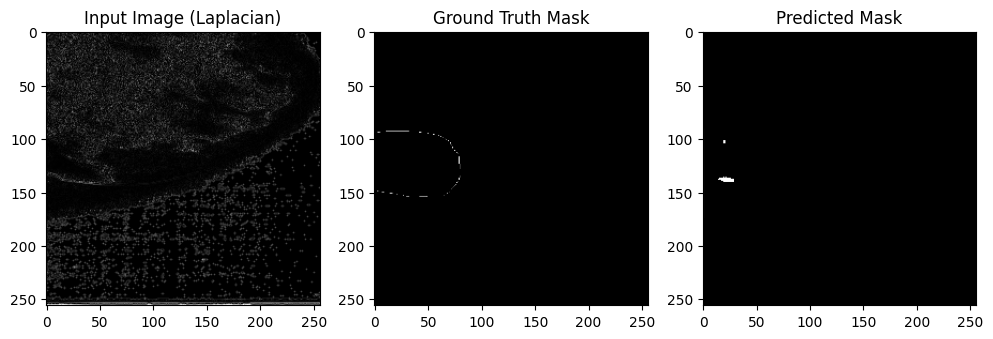

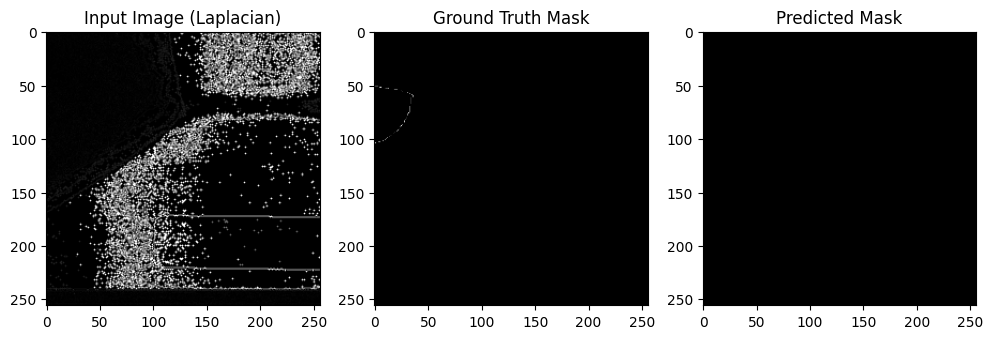

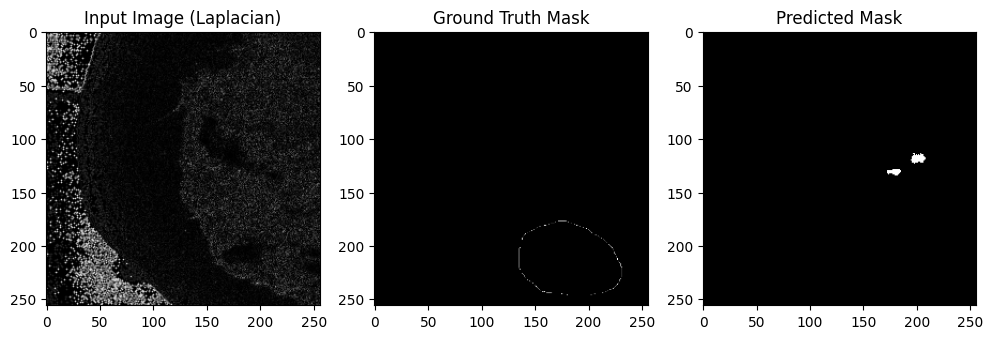

In [55]:
# This section computes the metrics
# This applies threshold to binarize predictions and flattens
y_pred = (model.predict(X_val, batch_size=8) > 0.5).astype(np.uint8)
y_true_flat = (y_val > 0.5).astype(np.uint8).flatten()
y_pred_flat = y_pred.flatten()

# This is the computation followed by the results printed out
precision = precision_score(y_true_flat, y_pred_flat, zero_division=0)
recall = recall_score(y_true_flat, y_pred_flat, zero_division=0)
f1 = f1_score(y_true_flat, y_pred_flat, zero_division=0)
jaccard = jaccard_score(y_true_flat, y_pred_flat, zero_division=0)
accuracy = accuracy_score(y_true_flat, y_pred_flat)
dice = (2 * np.sum(y_true_flat * y_pred_flat) + 1) / (np.sum(y_true_flat) + np.sum(y_pred_flat) + 1)

print(f"\nModified U-Net Model Evaluation Results:")
print(f"Precision: {precision:.4f}")
print(f"Recall (Sensitivity): {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"Jaccard Index (IoU): {jaccard:.4f}")
print(f"Accuracy: {accuracy:.4f}")
print(f"Dice Score: {dice:.4f}")

# This is a little visualization to view sample predictions
# 3 samples are being picked and 3 images of each sample are showned, input image, ground truth mask, and predicted mask
for idx in np.random.choice(len(X_val), 3, replace=False):
    plt.figure(figsize=(12,4))
    
    plt.subplot(1,3,1)
    plt.imshow(X_val[idx].squeeze(), cmap='gray')
    plt.title("Input Image (Laplacian)")
    
    plt.subplot(1,3,2)
    plt.imshow(y_val[idx].squeeze(), cmap='gray')
    plt.title("Ground Truth Mask")
    
    plt.subplot(1,3,3)
    plt.imshow(y_pred[idx].squeeze(), cmap='gray')
    plt.title("Predicted Mask")
    
    plt.show()

The Modified U-Net resulted in low Dice and IoU scores, even with high accuracy, indicating the class imbalance issue where lesion pixels represent a minor part of the image. The Laplacian-based preprocessing accentuated high-frequency edges, yet it did not significantly enhance the visibility of lesion areas in every instance. The model often forecasted background because of inadequate lesion representation in training, worsened by the small size of lesions compared to patch dimensions. Future research should investigate advanced data balancing techniques, including focal loss, weighted sampling, or synthetic augmentation, to tackle these issues.

## Model Comparison

Model comparisons indicated that merely expanding or deepening architectures led to minimal improvements, with accuracy stabilizing around 0.47–0.48 and subpar cancer detection. Regularization slightly enhanced recall but did not affect precision. The narrower models attained greater accuracy (0.56) yet continued to face challenges with cancer class precision. Transfer learning by itself could not generalize, predicting solely the cancer category.

Nevertheless, the multi-branch design that integrated the narrower model and transfer learning model, greatly enhanced performance, attaining 0.65 accuracy along with balanced macro and weighted F1-scores of 0.65, signifying improved management of class imbalance and feature extraction.

The Modified U-Net attained excellent per-pixel accuracy yet exhibited very low Dice and IoU scores. The main reason for the low scores is due toa lack of segmentation procedures prior to model training. This emphasizes difficulties in segmenting tumour boundaries even with background predominance in mammograms.

These findings collectively highlight that although changes in architecture and regularization provide small enhancements, tackling the fundamental issues of data imbalance and feature representation presents the most advantageous approach for enhancing mammogram classification and segmentation for the Mini-DDSM dataset.

## Conclusion

### Implications

One of the biggest limitations by far is the large time consumption training the models due to lack of computational resources and high-resolution mammography images. Even though the images have been shrunk to 224×224 pixels and early stopping as well as checkpoint are being integrated, the time taken to train a model is still substantial.

While the Modified U-Net model was implemented according to Hossain, M.S. (2022) [16], the output results show huge discrepancy compared to the article. Although there may be some differences in architectural approach, parameters, and computational environment, the implemented model concept remains similar. Main possible reason for the output disparity is largely due to the absence of the Skin and air boundary segmentation, Pectoral region segmentation, Suspicious regions selection, and manual observation to mark positive and negative patches after the automatic selection of suspicious and non-suspicious regions. Solutions would involve thresholding, Hough Transform, and MSER (Maximally Stable Extremal Regions).

A simple UI was created using the narrower_and_transfer_learning_model.keras checkpoint in python running locally using Flask with HTML and CSS for styling and presentation. The application starts up via a batch file that checks for dependencies for the python script before execution.

Project overall under delivers model results due to Cancer misclassification but highlights directions for improvements such as hybrid models in multi class classification for mammography images and segmentation importance for micro calcification detection. Solutions moving forward would involve heavy segmentation procedures in the hybrid models and especially for identification between Benign and Cancer cases.

Current code implementation uses downloaded Mini-DDSM files locally and may cause strains for computers with memory and computational challenges. Although GitHub allows Large File Storage (LFS), it is not optimal for large datasets to be uploaded as part of the repository especially since they are accessible via its origin, Kaggle. While not of current concern, future developments could include initializing the Mini-DDSM dataset from its Kaggle source for data manipulation to minimize or eliminate dataset related local storage.

### Future Directions

While future directions includes improvements that build upon and strengthen the works of this project, it also includes areas that can assist radiologists in hopes of progressing to gather feed back from the industry and eventually clinical trials.

Firstly, future research could investigate the use of more tailored models for each class within the multi-branch framework, aiming to enhance overall classification precision. For instance, lighter models like MobileNet or EfficientNet-Lite could be ideal for the Benign class, since these architectures efficiently capture texture and shape details without incurring too much computational cost. Conversely, intricate models like DenseNet, EfficientNet, or transformer-based structures such as the Swin Transformer may be utilized for the Cancer class, where identifying subtle and detailed features is essential. Likewise, the Normal class could gain from encoders trained through self-supervised learning methods, which can grasp overall breast structures and contextual details. Customizing architectures to fit the distinct features of each class would enable the branches to specialize better, and their combined outputs might improve the overall robustness and precision of the multi-branch model.

Secondly, advanced segmentation methods should be applied and examined particularly for the Cancer class and its related masks to enhance the detection of cancer calcifications. Techniques like pyramid pooling or Feature Pyramid Networks (FPNs) can be employed to detect calcifications at various scales, due to their considerable diversity in size and appearance. Additionally, frameworks like Attention U-Net, Swin-UNet, or nnU-Net could be evaluated for their proven effectiveness in medical image segmentation. These methods would enable the model to more clearly define suspicious areas of interest, thereby increasing interpretability and boosting the dependability of cancer detection in clinical environments.

Thirdly, future works can aim to emphasize the locations of cancer when it is identified. This can be accomplished by integrating weakly supervised localization or object detection methods that can generate interpretable visual results. For example, object detection models like YOLOv8 or Faster R-CNN could be trained to identify and locate suspicious lesions, generating bounding boxes and heatmaps that highlight cancer predictions. Alternatively, techniques for explainability like Grad-CAM or Score-CAM can be utilized to emphasize the important regions of mammograms that affect the model’s choices. Integrating visual indicators with classification results would enhance confidence in the system and assist in connecting automated predictions with medical decision making.

Finally, the framework can be aimed to forecast not just the existence of cancer but also address its stage and related biomarkers. This can be accomplished via multi-task learning, utilizing distinct output heads for training in both binary cancer detection and stage classification. This method would offer more clinically relevant insights, advancing from mere detection to prognostic evaluations. Additionally, employing explainable AI models may help pinpoint the particular image characteristics like calcification density, spiculated edges, or abnormal growth patterns that relate to cancer stages or established biomarkers.

All in all, despite the appearance of multiple challenges, including overfitting, class imbalance, and complications in accurately identifying cancerous instances, the existing outcomes, especially the Narrower and Transfer Learning Multi-Branch Model, shows steady improvements. These future research directions suggested can enhance and expand upon current metric scores, offering a more comprehensive perspective on cancer diagnosis and progression.

## UI Implementation in ipynb

This section involves implementing a UI for the saved .keras models. The implementation here is meant to be transfered to py and opened most likely with a batch file for local use for privacy and security purposes. The cells involved re calls imports and libraries after a kernal reset to highlight the required libraries for local py usage. While it is not ideal and questionable to pre implement the UI in an .ipynb file especially using codes such as '@app.route' for example, this section acts as an initial documentation of the UI implementation.

In [5]:
pip install Flask

  Using cached itsdangerous-2.2.0-py3-none-any.whl.metadata (1.9 kB)
Using cached itsdangerous-2.2.0-py3-none-any.whl (16 kB)

   ---------------------------------------- 0/5 [jinja2]
   ---------------- ----------------------- 2/5 [click]
   -------------------------------- ------- 4/5 [Flask]
   ---------------------------------------- 5/5 [Flask]

Note: you may need to restart the kernel to use updated packages.


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [3]:
import tensorflow as tf
import keras

print("TensorFlow version:", tf.__version__)
print("Keras version:", keras.__version__)

import sys
print(sys.version)

TensorFlow version: 2.19.0
Keras version: 3.10.0
3.10.18 | packaged by Anaconda, Inc. | (main, Jun  5 2025, 13:08:55) [MSC v.1929 64 bit (AMD64)]


In [1]:
import os
import numpy as np
import cv2
from flask import Flask, render_template, request
from tensorflow.keras.layers import Lambda
from tensorflow.keras.models import load_model

In [3]:
# This line suppresses tensorflow warnings, used in debugging due to py, tf, and keras mismatch
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

# This is the models path, take note that lambda was used
MODEL_PATH = "narrower_and_transfer_learning_model.keras"
model = load_model(MODEL_PATH, custom_objects={'Lambda': Lambda}, compile=False, safe_mode=False)

CLASS_NAMES = ['Benign', 'Cancer', 'Normal']

# This are templates and static folders according to flask app templates and examples
app = Flask(__name__, template_folder='templates', static_folder='static')
UPLOAD_FOLDER = os.path.join('static', 'uploads')
os.makedirs(UPLOAD_FOLDER, exist_ok=True)

In [5]:
def preprocess_image(image_path):
    # This right here preprocess uploaded image into (224,224,4) format
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (224, 224)) / 255.0
    mask = np.zeros_like(img)

    # This stacks 3 grayscale channels and a mask
    combined_input = np.stack([img, img, img, mask], axis=-1)
    return np.expand_dims(combined_input, axis=0).astype(np.float32)

In [7]:

@app.route("/", methods=["GET", "POST"])
def index():
    if request.method == "POST":
        file = request.files.get("file")
        if not file or file.filename == "":
            return render_template("index.html", error="No file uploaded.")

        # Save uploaded file into static/uploads for data gathering and future model improvements if needed.
        filename = file.filename
        img_path = os.path.join(UPLOAD_FOLDER, filename)
        file.save(img_path)

        input_tensor = preprocess_image(img_path)
        preds = model.predict(input_tensor, verbose=0)[0]

        # This section maps the results
        results = {CLASS_NAMES[i]: round(float(preds[i] * 100), 2) for i in range(len(CLASS_NAMES))}
        top_class = CLASS_NAMES[np.argmax(preds)]
        top_score = results[top_class]

        uploaded_image = f"uploads/{filename}"


        return render_template(
            "index.html",
            uploaded_image=uploaded_image,
            results=results,
            top_class=top_class,
            top_score=top_score
        )

    return render_template("index.html")
    
if __name__ == "__main__":
    app.run(debug=True, use_reloader=False)

 * Serving Flask app '__main__'
 * Debug mode: on


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
127.0.0.1 - - [17/Aug/2025 16:38:07] "POST / HTTP/1.1" 200 -
127.0.0.1 - - [17/Aug/2025 16:38:07] "GET /styles.css HTTP/1.1" 404 -
127.0.0.1 - - [17/Aug/2025 16:38:07] "GET /uploads/A_1000_1.LEFT_CC.png HTTP/1.1" 404 -
127.0.0.1 - - [17/Aug/2025 16:38:19] "POST / HTTP/1.1" 200 -
127.0.0.1 - - [17/Aug/2025 16:38:19] "GET /styles.css HTTP/1.1" 404 -
127.0.0.1 - - [17/Aug/2025 16:38:19] "GET /uploads/A_1000_1.LEFT_CC.png HTTP/1.1" 404 -
127.0.0.1 - - [17/Aug/2025 16:38:25] "POST / HTTP/1.1" 200 -
127.0.0.1 - - [17/Aug/2025 16:38:25] "GET /styles.css HTTP/1.1" 404 -
127.0.0.1 - - [17/Aug/2025 16:38:25] "GET /uploads/A_1000_1.LEFT_MLO.png HTTP/1.1" 404 -
127.0.0.1 - - [17/Aug/2025 16:38:38] "POST / HTTP/1.1" 200 -
127.0.0.1 - - [17/Aug/2025 16:38:38] "GET /styles.css HTTP/1.1" 404 -
127.0.0.1 - - [17/Aug/2025 16:38:38] "GET /uploads/A_1329_1.LEFT_MLO.png HTTP/1.1" 404 -


## Authors’ Declarations

### Conflict of Interest

The author declares that there are no commercial or financial relationships that could be interpreted as a potential conflict of interest in this research.

### Consent

This study makes use of publicly available secondary data (Mini-DDSM dataset [3]) and does not involve any direct interaction with human participants or animals by the author.

### Authors’ Notes

As this notebook supports a broader project focused on enhancing breast cancer identification in mammography images through deep learning techniques, most references, figures, tables, and additional notes have been omited to limit length and focus on code implementation.

Given the significant rapidly expanding and evolving volume of related literature, some pertinent studies may not have been cited. Nonetheless, attempts were undertaken to reference several publications and ensure an academic foundation for the project.
The author also wishes to note deadlines set, unforeseen circumstances, and time constraints that may have resulted in a lack and or lapse of certain actions, outcomes, and insights that could have potentially contributed towards the project.

__Correspondence: Wong Zheng Jie, wzhengjie99@gmail.com; zjwong004@mymail.sim.edu.sg__


## References

[1]	NHS Digital (2025) AI knowledge repository. [Online] Available at: https://digital.nhs.uk/services/ai-knowledge-repository (Accessed: 2025).

[2]	UK Government (2025) World-leading AI trial to tackle breast cancer launched. [Online] Available at: https://www.gov.uk/government/news/world-leading-ai-trial-to-tackle-breast-cancer-launched (Accessed: 2025).

[3]	Cheddad, A. (2021) The Complete Mini-DDSM [Data set]. Kaggle. [Online] Available at: https://www.kaggle.com/datasets/cheddad/miniddsm2 (Accessed: 2025).

[4]	Lekamlage, C.D., Afzal, F., Westerberg, E. and Cheddad, A. (2020) ‘Mini-DDSM: Mammography-based Automatic Age Estimation’, in Proceedings of the 3rd International Conference on Digital Medicine and Image Processing (DMIP 2020), Kyoto, Japan, 6–9 November. New York: ACM. [Online] Available at: https://arxiv.org/pdf/2010.00494v1 (Accessed: 2025).

[5]	Heath, M., Bowyer, K., Kopans, D., Moore, R. and Kegelmeyer, W.P. (2001) ‘The Digital Database for Screening Mammography’, in Yaffe, M.J. (ed.) Proceedings of the Fifth International Workshop on Digital Mammography. Madison, WI: Medical Physics Publishing, pp. 212–218. [Online] Available at: http://www.eng.usf.edu/cvprg/Mammography/software/HeathEtAlIWDM_2000.pdf (Accessed: 2025).

[6]	Wang, L. (2024) ‘Mammography with deep learning for breast cancer detection’, Frontiers in Oncology, 14, 1281922. doi: 10.3389/fonc.2024.1281922. [Online] Available at:	 https://www.frontiersin.org/journals/oncology/articles/10.3389/fonc.2024.1281922/full (Accessed: 2025).

[7]	Sawyer-Lee, R., Gimenez, F., Hoogi, A., & Rubin, D. (2016). Curated Breast Imaging Subset of Digital Database for Screening Mammography (CBIS-DDSM) [Data set]. The Cancer Imaging Archive. doi: 10.7937/K9/TCIA.2016.7O02S9CY. Available at: https://doi.org/10.7937/K9/TCIA.2016.7O02S9CY

[8]	World Health Organization (WHO) and International Agency for Research on Cancer (IARC) (2024) Global cancer burden growing, amidst mounting need for services. Lyon, France; Geneva, Switzerland: WHO. [Online] Available at:	 https://www.who.int/news/item/01-02-2024-global-cancer-burden-growing--amidst-mounting-need-for-services (Accessed: 2025).

[9]	OHSU Knight Cancer Institute (2025) Understanding breast cancer. Oregon Health & Science University. [Online] Available at: https://www.ohsu.edu/knight-cancer-institute/understanding-breast-cancer (Accessed: 2025).

[10]	DePolo, J. and Fox, K. (2025) Understanding your pathology report – breast cancer stages. Breastcancer.org. [Online] Available at:	 https://www.breastcancer.org/pathology-report/breast-cancer-stages (Accessed: 2025).

[11]	Malhotra, P., El-Ashry, D., Rubio, M., Schlamadinger, D. and Sile, E. (2025) Mammograms: everything you need to know. Breast Cancer Research Foundation. [Online] Available at: 
https://www.bcrf.org/about-breast-cancer/mammogram-breast-cancer-screening/ (Accessed: 2025).

[12]	Cancer Research UK (2023) Getting diagnosed with breast cancer – breast screening. [Online] Available at: https://www.cancerresearchuk.org/about-cancer/breast-cancer/getting-diagnosed/screening-breast (Accessed: 2025).

[13]	Cerdas, M.G., Farhat, J., Elshafie, S.I., Mariyam, F., James, L., Qureshi, A.K., Potru, M., Paliwei, P., Joshi, M.R., Abraham, G. and Siddiqui, H.F. (2025) ‘Exploring the evolution of breast cancer imaging: a review of conventional and emerging modalities’, Cureus. doi: 10.7759/cureus.82762. [Online] Available at:	 https://acsjournals.onlinelibrary.wiley.com/doi/full/10.3322/caac.21863 (Accessed: 2025).

[14]	Srivastava, A., Ahmad, R., Yadav, K., Siddiqui, S., Trivedi, A., Misra, A., Mehrotra, S., Ahmad, B.A., and Khan, M.A. (2024) ‘An update on existing therapeutic options and status of novel anti-metastatic agents in breast cancer: elucidating the molecular mechanisms underlying the pleiotropic action of Withania somnifera (Indian ginseng) in breast cancer attenuation’, International Immunopharmacology, 136, 112232. doi: 10.1016/j.intimp.2024.112232. [Online] Available at:	 https://onlinelibrary.wiley.com/doi/full/10.1155/2024/9003572 (Accessed: 2025).

[15]	UK Government (2024) Independent investigation of the NHS in England: Lord Darzi's report. Department of Health and Social Care. [Online] Available at: https://www.gov.uk/government/publications/independent-investigation-of-the-nhs-in-england (Accessed: 2025).

[16]	Hossain, M.S., (2022). Microc alcification segmentation using modified u-net segmentation network from mammogram images. Journal of King Saud University-Computer and Information Sciences, 34(2), pp.86-94. Available at: https://doi.org/10.1016/j.jksuci.2019.10.014 (Accessed: 2025).
